In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Neural Networks for Pattern Recognition

### Introduction

In Chapters 3 and 4, we considered models for regression and classification that were linear combinations of fixed basis functions. These models, though useful, were limited by the **curse of dimensionality**. To apply such models to large-scale problems, it's essential to adapt the basis functions to the data.

### Support Vector Machines (SVMs)
SVMs address this issue by defining basis functions centered on the training data points. During training, a subset of these functions is selected, leading to a sparse model. One of the key advantages of SVMs is that the optimization problem is **convex**, making the training process computationally feasible. However, as the training set size increases, the number of basis functions also increases.

### Relevance Vector Machine (RVM)
The **Relevance Vector Machine (RVM)**, similar to SVMs, selects a subset of basis functions. However, unlike SVMs, RVMs provide **probabilistic outputs**, albeit with non-convex optimization during training. The resulting models are typically sparser compared to SVMs.

### Neural Networks and Feed-Forward Models
An alternative approach is to fix the number of basis functions but allow them to adapt during training. One successful model of this type in pattern recognition is the **feed-forward neural network (FFNN)**, also known as the **multilayer perceptron (MLP)**.

The term "multilayer perceptron" is actually a misnomer, as the model consists of multiple layers of logistic regression models with continuous nonlinearities, not multiple perceptrons (which have discontinuous nonlinearities).

In many cases, the resulting model is more compact and faster to evaluate than an SVM with similar generalization performance. The key trade-off, however, is that the likelihood function for neural network training is **non-convex**, requiring more computational resources for training.

## Neural Networks: Foundations and Optimization

### Functional Form of the Model
The neural network model consists of layers of neurons, where each neuron applies a **nonlinear activation function** to a weighted sum of its inputs. For an input vector $ \mathbf{x} $ and weights $ \mathbf{w} $, the output $ y $ of a neuron with a sigmoid activation function can be written as:

$$
y = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

where $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the logistic sigmoid function.

For a **multilayer perceptron** with $ L $ layers, the output can be expressed as:

$$
y_L = \sigma_L\left( \mathbf{W}_L \sigma_{L-1}\left( \cdots \sigma_1(\mathbf{W}_1 \mathbf{x}) \cdots \right) \right)
$$

where $ \mathbf{W}_i $ represents the weights for the $ i $-th layer, and $ \sigma_i $ is the activation function at each layer.

### Maximum Likelihood Estimation
To train the neural network, we typically maximize the **log-likelihood function** of the model parameters given the data. If the dataset consists of $ N $ samples $ \{ (\mathbf{x}_i, t_i) \} $, where $ t_i $ are the target labels, the likelihood for a binary classification problem is:

$$
P(t_i | \mathbf{x}_i, \mathbf{w}) = \sigma(\mathbf{w}^T \mathbf{x}_i)
$$

The log-likelihood function is:

$$
\mathcal{L}(\mathbf{w}) = \sum_{i=1}^{N} \left( t_i \log P(t_i = 1 | \mathbf{x}_i, \mathbf{w}) + (1 - t_i) \log P(t_i = 0 | \mathbf{x}_i, \mathbf{w}) \right)
$$

This function needs to be maximized using optimization techniques, typically involving **gradient descent**.

### Backpropagation
To perform the optimization, we compute the **gradient** of the log-likelihood function with respect to the network parameters. This is done efficiently using the **backpropagation** algorithm, which applies the **chain rule** to propagate the errors backward from the output layer to the input layer.

The gradient of the log-likelihood function for each weight is computed as:

$$
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}_k} = \sum_{i=1}^{N} \left( \frac{\partial \mathcal{L}(i)}{\partial \mathbf{w}_k} \right)
$$

This allows the weights to be updated in the direction of the steepest ascent of the log-likelihood.

### Regularization
Regularization techniques are used to prevent **overfitting** by penalizing complex models. Common approaches include:

- **L2 Regularization (Ridge Regression):**

$$
\mathcal{L}_{\text{reg}}(\mathbf{w}) = \mathcal{L}(\mathbf{w}) + \lambda \|\mathbf{w}\|^2
$$

- **L1 Regularization (Lasso):**

$$
\mathcal{L}_{\text{reg}}(\mathbf{w}) = \mathcal{L}(\mathbf{w}) + \lambda \|\mathbf{w}\|_1
$$

Where $ \lambda $ is the regularization parameter.

### Mixture Density Networks
An extension to the feed-forward neural network is the **Mixture Density Network (MDN)**, which models a **conditional probability distribution** over the outputs. The network produces parameters for a mixture of Gaussian distributions, allowing it to model more complex output distributions than simple point estimates.

The output of the network is:

$$
P(y | \mathbf{x}) = \sum_{k=1}^{K} \pi_k(\mathbf{x}) \mathcal{N}(y | \mu_k(\mathbf{x}), \sigma_k(\mathbf{x}))
$$

Where $ \pi_k(\mathbf{x}) $, $ \mu_k(\mathbf{x}) $, and $ \sigma_k(\mathbf{x}) $ are the mixture weights, means, and variances, respectively.

## Bayesian Neural Networks
Finally, **Bayesian Neural Networks (BNNs)** introduce a probabilistic interpretation of the model parameters. In a BNN, the weights are treated as random variables with a prior distribution, and the posterior distribution is computed given the data. The objective is to maximize the posterior distribution:

$$
P(\mathbf{w} | \mathcal{D}) \propto P(\mathcal{D} | \mathbf{w}) P(\mathbf{w})
$$

where $ \mathcal{D} $ is the training data. Techniques like **variational inference** or **Markov Chain Monte Carlo (MCMC)** can be used to approximate the posterior distribution.

## Conclusion
Neural networks, specifically the multilayer perceptron, provide a flexible and powerful framework for pattern recognition. While training can be computationally intensive due to non-convex optimization, the resulting models are compact and efficient for large-scale applications. Regularization, mixture density networks, and Bayesian methods offer ways to improve performance and handle uncertainty in predictions.


## Feed-Forward Neural Network Functions

### Introduction

In the previous chapters, we discussed linear models for regression and classification that were based on linear combinations of fixed nonlinear basis functions $ \phi_j(x) $. These models take the form:

$$
y(x, \mathbf{w}) = f\left( \sum_{j=1}^M w_j \phi_j(x) \right)
$$

where $ f(\cdot) $ is a nonlinear activation function in the case of classification, and the identity function in the case of regression. The goal is to extend this model by making the basis functions $ \phi_j(x) $ depend on parameters and adjusting these parameters during training.

## Parametric Basis Functions

In neural networks, the basis functions are constructed in the same form, but each basis function is itself a nonlinear transformation of a linear combination of the input variables. These coefficients are adaptive parameters, leading to the basic neural network model.

### First Layer: Linear Combination of Inputs

We begin by constructing $ M $ linear combinations of the input variables $ x_1, \dots, x_D $ in the following form:

$$
a_j^{(1)} = \sum_{i=1}^D w_{ji}^{(1)} x_i + w_{j0}^{(1)} \quad \text{for} \quad j = 1, \dots, M
$$

where $ w_{ji}^{(1)} $ are the weights, and $ w_{j0}^{(1)} $ are the bias parameters for the first layer of the network. The quantities $ a_j^{(1)} $ are called activations.

### Activation Function

Each activation $ a_j^{(1)} $ is then transformed using a differentiable, nonlinear activation function $ h(\cdot) $ to give:

$$
z_j = h(a_j^{(1)}) \quad \text{for} \quad j = 1, \dots, M
$$

These quantities $ z_j $ are the outputs of the basis functions in the context of neural networks, often referred to as **hidden units**.

Common choices for the activation function $ h(\cdot) $ are **sigmoid functions** such as the logistic sigmoid or the **tanh** function.

### Second Layer: Linear Combination of Hidden Units

Next, the hidden units $ z_j $ are linearly combined to produce output unit activations:

$$
a_k^{(2)} = \sum_{j=1}^M w_{kj}^{(2)} z_j + w_{k0}^{(2)} \quad \text{for} \quad k = 1, \dots, K
$$

where $ w_{kj}^{(2)} $ are the weights, and $ w_{k0}^{(2)} $ are the bias parameters for the second layer of the network.

### Final Output Transformation

Finally, the output unit activations $ a_k^{(2)} $ are transformed using an appropriate activation function to give the network's output $ y_k $. The choice of activation function depends on the problem:

- For **regression**, the activation function is the identity, so:

$$
y_k = a_k^{(2)}
$$

- For **binary classification**, a logistic sigmoid function is used:

$$
y_k = \sigma(a_k^{(2)}) = \frac{1}{1 + \exp(-a_k^{(2)})}
$$

- For **multiclass classification**, a **softmax** function is used to normalize the outputs across multiple classes.

### Overall Network Function

Combining all the steps, the overall function of the neural network can be written as:

$$
y_k(x, \mathbf{w}) = \sigma\left( \sum_{j=1}^M w_{kj}^{(2)} h\left( \sum_{i=1}^D w_{ji}^{(1)} x_i + w_{j0}^{(1)} \right) + w_{k0}^{(2)} \right)
$$

where $ \mathbf{w} $ represents the set of all weight and bias parameters. This function is a nonlinear transformation from the set of input variables $ \{x_i\} $ to the output variables $ \{y_k\} $, controlled by the adjustable parameters in $ \mathbf{w} $.

### Network Diagram

The neural network can be represented as a directed acyclic graph (DAG), where the input, hidden, and output variables are represented by nodes, and the weight parameters are represented by links between the nodes. The biases are represented by additional links coming from extra input variables $ x_0 = 1 $ and hidden units $ z_0 = 1 $.

Arrows denote the flow of information through the network during **forward propagation**.

### Summary

The feed-forward neural network is a function that maps inputs $ \mathbf{x} $ to outputs $ \mathbf{y} $ by applying a series of transformations, including linear combinations, nonlinear activations, and further transformations through multiple layers. The network is trained by adjusting the weights and biases to minimize the loss function, and the forward propagation process can be visualized through the network diagram.

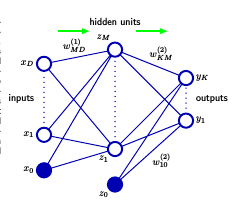

Fig.1 Network diagram for the two- layer neural network corresponding to (5.7). The input, hidden, and output variables are represented by nodes, and the weight parameters are represented by links between the nodes, in which the bias pa- rameters are denoted by links coming from additional input and hidden variables $x_0$ and $z_0$ . Arrows denote the direction of information ﬂow through the network during forward propagation.

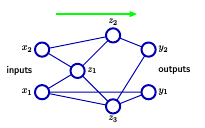

Fig.2 Example of a neural network having a general feed-forward topology. Note that each hidden and output unit has an associated bias parameter (omitted for clarity). 

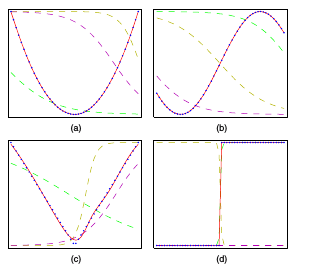

Fig.3 Illustration of the ca- pability of a multilayer perceptron to approximate four different func- tions comprising (a) f (x) = x2 , (b) f (x) = sin(x), (c), f (x) = |x|, and (d) f (x) = H(x) where H(x) is the Heaviside step function. In each case, N = 50 data points, shown as blue dots, have been sam- pled uniformly in x over the interval (−1, 1) and the corresponding val- ues of f (x) evaluated. These data points are then used to train a two- layer network having 3 hidden units with ‘tanh’ activation functions and linear output units. The resulting network functions are shown by the red curves, and the outputs of the three hidden units are shown by the three dashed curves.

## Feed-Forward Neural Network Notation and Architecture

## Absorbing Bias Parameters

As discussed in Section 3.1, the bias parameters in the network can be absorbed into the set of weight parameters by defining an additional input variable $ x_0 $# whose value is clamped at $ x_0 = 1 $. This allows us to rewrite the linear combination in the first layer as:

$$
a_j^{(1)} = \sum_{i=0}^D w_{ji}^{(1)} x_i
$$

where $ i = 0, 1, \dots, D $, and the additional term accounts for the bias.

Similarly, we can absorb the bias parameters in the second layer into the weight parameters, leading to the overall network function:

$$
y_k(x, \mathbf{w}) = \sigma\left( \sum_{j=0}^M w_{kj}^{(2)} h\left( \sum_{i=0}^D w_{ji}^{(1)} x_i \right) \right)
$$

where $ \sigma $ is the logistic sigmoid function, $ h(\cdot) $ is the activation function, and the $ w_{ji}^{(1)} $ and $ w_{kj}^{(2)} $ represent the weights for the first and second layers respectively.

## Multilayer Perceptron (MLP)

The neural network described above is often referred to as the **multilayer perceptron (MLP)**. It consists of two layers of processing, each resembling a perceptron model. The key difference is that the neural network uses continuous sigmoidal nonlinearities in the hidden units, whereas the perceptron uses step-function nonlinearities.

### Linear Units in Networks

If all the activation functions of the hidden units in a network are linear, we can always find an equivalent network without hidden units. This is because the composition of successive linear transformations results in another linear transformation. However, when the number of hidden units is smaller than either the number of input or output units, the transformations generated by the network are not the most general linear transformations because of dimensionality reduction at the hidden units.

### Generalizing Network Architectures

The architecture shown in Fig.1 can be generalized in several ways:

1. **Additional Layers**: More layers of processing can be added, each consisting of a weighted linear combination followed by a nonlinear activation function.

2. **Skip-Layer Connections**: Skip-layer connections allow direct connections from the input layer to the output layer. These connections can be explicitly modeled in a network, improving the flexibility of the network.

3. **Sparse Networks**: Not all possible connections between layers need to be present, and this sparsity can be exploited in specific network architectures, such as **convolutional neural networks (CNNs)**.

### Network Diagrams and General Feed-Forward Topology

Network diagrams are a powerful way to represent the structure of a neural network. Each node in the diagram represents a hidden or output unit, and the edges represent the weights between these units. The process of computing the network output involves applying a series of transformations, where the activation for each hidden or output unit is calculated using the following formula:

$$
z_k = h\left( \sum_{j} w_{kj} z_j \right)
$$

where the sum runs over all the units that send connections to unit $ k $. A bias term is also included in the summation.

### Approximation Properties of Feed-Forward Networks

Feed-forward networks have been studied extensively and found to be universal approximators. A **two-layer network with linear outputs** can approximate any continuous function on a compact input domain to arbitrary accuracy, provided it has a sufficient number of hidden units. This result holds for a wide range of activation functions, but excluding polynomials.

### Summary

In this section, we have discussed the notation and general structure of feed-forward neural networks. The key features of the network include the ability to absorb bias terms into the weights, the flexibility of using multiple layers of nonlinear transformations, and the fact that neural networks are universal approximators. The next steps in training a network involve adjusting the parameters to best fit the training data, which is discussed in later sections.


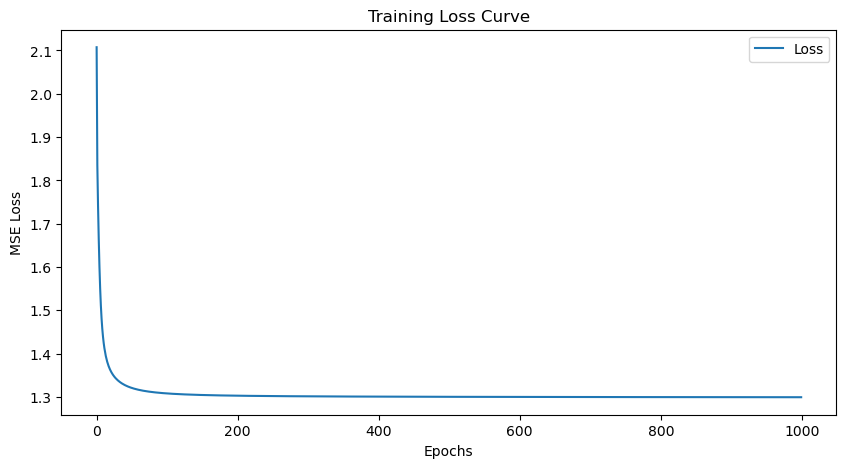

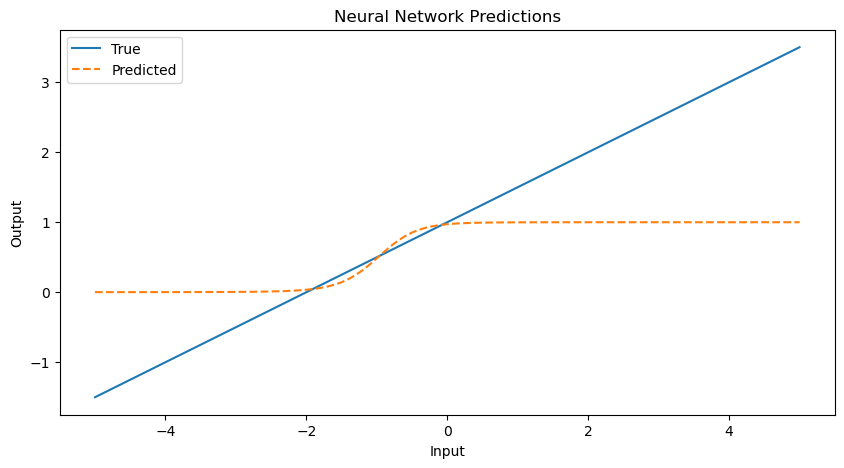

In [1]:
import random
import math
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return sum((yt - yp)**2 for yt, yp in zip(y_true, y_pred)) / len(y_true)

# Neural Network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases randomly
        self.weights1 = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.bias1 = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.weights2 = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(hidden_size)]
        self.bias2 = [random.uniform(-1, 1) for _ in range(output_size)]
        
    def forward(self, x):
        # First layer computations
        self.a1 = [sum(x[i] * self.weights1[i][j] for i in range(len(x))) + self.bias1[j] for j in range(len(self.bias1))]
        self.z1 = [sigmoid(a) for a in self.a1]
        
        # Second layer computations
        self.a2 = [sum(self.z1[j] * self.weights2[j][k] for j in range(len(self.z1))) + self.bias2[k] for k in range(len(self.bias2))]
        self.z2 = [sigmoid(a) for a in self.a2]
        
        return self.z2
    
    def backward(self, x, y_true, learning_rate=0.01):
        # Output layer error
        output_error = [-(yt - yp) for yt, yp in zip(y_true, self.z2)]
        d_output = [error * sigmoid_derivative(a) for error, a in zip(output_error, self.a2)]
        
        # Hidden layer error
        hidden_error = [sum(d_output[k] * self.weights2[j][k] for k in range(len(self.bias2))) for j in range(len(self.bias1))]
        d_hidden = [error * sigmoid_derivative(a) for error, a in zip(hidden_error, self.a1)]
        
        # Update second layer weights and biases
        for j in range(len(self.bias1)):
            for k in range(len(self.bias2)):
                self.weights2[j][k] -= learning_rate * d_output[k] * self.z1[j]
        for k in range(len(self.bias2)):
            self.bias2[k] -= learning_rate * d_output[k]
        
        # Update first layer weights and biases
        for i in range(len(x)):
            for j in range(len(self.bias1)):
                self.weights1[i][j] -= learning_rate * d_hidden[j] * x[i]
        for j in range(len(self.bias1)):
            self.bias1[j] -= learning_rate * d_hidden[j]
    
    def train(self, X, Y, epochs=1000, learning_rate=0.01):
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for x, y in zip(X, Y):
                y_pred = self.forward(x)
                epoch_loss += mse_loss(y, y_pred)
                self.backward(x, y, learning_rate)
            losses.append(epoch_loss / len(X))
        return losses

# Generate some simple training data for a regression problem
X_train = [[x / 10] for x in range(-50, 51)]  # Inputs
Y_train = [[0.5 * x[0] + 1] for x in X_train]  # Targets

# Create and train the neural network
nn = SimpleNeuralNetwork(input_size=1, hidden_size=5, output_size=1)
losses = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.05)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Plot the predictions
predictions = [nn.forward(x)[0] for x in X_train]
plt.figure(figsize=(10, 5))
plt.plot([x[0] for x in X_train], [y[0] for y in Y_train], label='True')
plt.plot([x[0] for x in X_train], predictions, label='Predicted', linestyle='dashed')
plt.title('Neural Network Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


In [ ]:
5.1.1 Weight-space symmetries One property of feed-forward networks, which will play a role when we consider Bayesian model comparison, is that multiple distinct choices for the weight vector w can all give rise to the same mapping function from inputs to outputs (Chen et al., 1993). Consider a two-layer network of the form shown in Figure 5.1 with M hidden units having ‘tanh’ activation functions and full connectivity in both layers. If we change the sign of all of the weights and the bias feeding into a particular hidden unit, then, for a given input pattern, the sign of the activation of the hidden unit will be reversed, because ‘tanh’ is an odd function, so that tanh(−a) = − tanh(a). This transformation can be exactly compensated by changing the sign of all of the weights leading out of that hidden unit. Thus, by changing the signs of a particular group of weights (and a bias), the input–output mapping function represented by the network is unchanged, and so we have found two different weight vectors that give rise to the same mapping function. For M hidden units, there will be M such ‘sign-ﬂip’

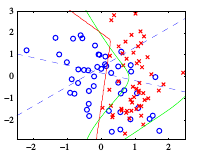

Fig.4 Example of the solution of a simple two- class classiﬁcation problem involving synthetic data using a neural network having two inputs, two hidden units with ‘tanh’ activation functions, and a single output having a logistic sigmoid activation function. The dashed blue lines show the z = 0.5 contours for each of the hidden units, and the red line shows the y = 0.5 decision surface for the net- work. For comparison, the green line denotes the optimal decision boundary computed from the distributions used to generate the data.

##  Weight-Space Symmetries

One property of feed-forward networks, which will play a role when we consider Bayesian model comparison, is that multiple distinct choices for the weight vector $ \mathbf{w} $ can all give rise to the same mapping function from inputs to outputs (Chen et al., 1993). Consider a two-layer network with $ M $ hidden units having $\tanh$ activation functions and full connectivity in both layers.

### Symmetry due to sign flips
If we change the sign of all weights and the bias feeding into a particular hidden unit, the sign of the hidden unit's activation will be reversed because $\tanh$ is an odd function:
$$
\tanh(-a) = -\tanh(a)
$$

This change can be compensated by flipping the signs of all weights leading out of that hidden unit, leaving the input-output mapping unchanged. For $ M $ hidden units, there will be $ 2^M $ such sign-flip symmetries.

### Symmetry due to unit permutations
Interchanging the weights and biases of two hidden units also leaves the network function unchanged. There are $ M! $ such permutations of $ M $ hidden units.

### Total symmetry factor
The total symmetry factor for a two-layer network is:
$$
M! \cdot 2^M
$$
For networks with more than two layers, the total symmetry is the product of such factors for each layer of hidden units.

---

##  Network Training

Neural networks represent a parametric nonlinear mapping from input vector $ \mathbf{x} $ to output vector $ \mathbf{y} $. To train the network, we minimize a sum-of-squares error function.

Given a dataset of $ N $ input vectors $ \{ \mathbf{x}_n \} $ and corresponding target vectors $ \{ \mathbf{t}_n \} $, the error function is:

$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \| \mathbf{y}(\mathbf{x}_n, \mathbf{w}) - \mathbf{t}_n \|^2
$$

### Probabilistic Interpretation
Assuming a Gaussian noise model for target variable $ t $ with mean given by the network output $ y(\mathbf{x}, \mathbf{w}) $ and precision $ \beta $:
$$
p(t | \mathbf{x}, \mathbf{w}) = \mathcal{N}(t | y(\mathbf{x}, \mathbf{w}), \beta^{-1})
$$

The likelihood for the dataset $ X = \{\mathbf{x}_1, \dots, \mathbf{x}_N\} $ and targets $ t = \{t_1, \dots, t_N\} $ is:
$$
p(t | X, \mathbf{w}, \beta) = \prod_{n=1}^N p(t_n | \mathbf{x}_n, \mathbf{w}, \beta)
$$

Taking the negative log-likelihood gives:
$$
-\log p(t | X, \mathbf{w}, \beta) = \frac{\beta}{2} \sum_{n=1}^N (y(\mathbf{x}_n, \mathbf{w}) - t_n)^2 - \frac{N}{2} \log \beta + \frac{N}{2} \log (2\pi)
$$

### Maximum Likelihood Estimation
Maximizing the likelihood is equivalent to minimizing the sum-of-squares error:
$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N (y(\mathbf{x}_n, \mathbf{w}) - t_n)^2
$$


Epoch 0, Loss: 0.6274
Epoch 500, Loss: 0.5510
Epoch 1000, Loss: 0.5485
Epoch 1500, Loss: 0.5478
Epoch 2000, Loss: 0.5473
Epoch 2500, Loss: 0.5469
Epoch 3000, Loss: 0.5466
Epoch 3500, Loss: 0.5464
Epoch 4000, Loss: 0.5462
Epoch 4500, Loss: 0.5461


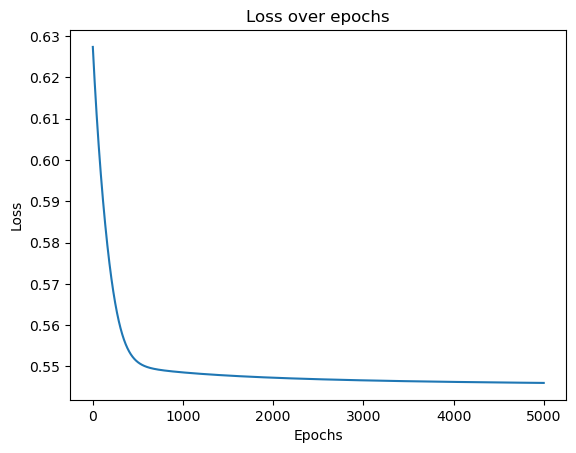

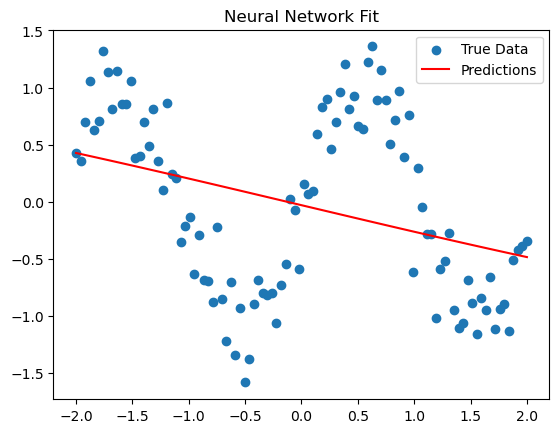

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)  # 100 data points
y_true = np.sin(3 * X) + 0.3 * np.random.randn(100, 1)  # True function + noise

# Define utility functions for the neural network
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.1
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.1
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = X.dot(W1) + b1
    A1 = tanh(Z1)
    Z2 = A1.dot(W2) + b2
    return Z1, A1, Z2

# Backward pass
def backward_pass(X, y, Z1, A1, Z2, W2):
    m = X.shape[0]
    dZ2 = (Z2 - y) / m
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

# Training
def train(X, y, hidden_dim, learning_rate=0.01, epochs=5000):
    input_dim = X.shape[1]
    output_dim = y.shape[1]
    
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    
    losses = []
    for epoch in range(epochs):
        # Forward pass
        Z1, A1, Z2 = forward_pass(X, W1, b1, W2, b2)
        
        # Compute loss
        loss = np.mean((Z2 - y)**2)
        losses.append(loss)
        
        # Backward pass
        dW1, db1, dW2, db2 = backward_pass(X, y, Z1, A1, Z2, W2)
        
        # Gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W1, b1, W2, b2, losses

# Train the network
hidden_dim = 10
W1, b1, W2, b2, losses = train(X, y_true, hidden_dim)

# Plot loss over time
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Plot predictions
_, _, predictions = forward_pass(X, W1, b1, W2, b2)
plt.scatter(X, y_true, label='True Data')
plt.plot(X, predictions, color='red', label='Predictions')
plt.title("Neural Network Fit")
plt.legend()
plt.show()


In [2]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(n=100):
    X = [(x / 25 - 2) for x in range(n)]  # Scaled between -2 and 2
    y = [math.sin(3 * x) + random.uniform(-0.3, 0.3) for x in X]
    return [[x] for x in X], [[yi] for yi in y]

# Activation function and its derivative
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t ** 2

# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = [[random.uniform(-0.1, 0.1) for _ in range(hidden_dim)] for _ in range(input_dim)]
    b1 = [0 for _ in range(hidden_dim)]
    W2 = [[random.uniform(-0.1, 0.1) for _ in range(output_dim)] for _ in range(hidden_dim)]
    b2 = [0 for _ in range(output_dim)]
    return W1, b1, W2, b2

# Dot product of two vectors
def dot_product(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

# Matrix-vector multiplication
def mat_vec_mul(matrix, vec):
    return [dot_product(row, vec) for row in matrix]

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = [dot_product(W1[i], X[i]) + b1[i] for i in range(len(W1))]
    A1 = [tanh(z) for z in Z1]
    Z2 = [dot_product(W2[i], A1) + b2[i] for i in range(len(W2))]
    return Z1, A1, Z2

# Backward pass
def backward_pass(X, y, Z1, A1, Z2, W2):
    m = len(X)
    dZ2 = [(Z2[i] - y[i]) / m for i in range(len(y))]
    dW2 = [dot_product(A1, dZ2) for j in range(len(A1))]
    db2 = sum(dZ2)
    dA1 = [sum([dZ2[k] * W2[i][j] for j in range(len(W2[0]))])]
    return dW2, db2

# Training function
def train(X, y, hidden_dim, epochs, learning_rate=0.01):
    n_features = len(y)
    W1, b1, W2, b2 = initialize_weights(len(y), hidden_dim, n_features)
    loss = []
    for i in range(epochs):
        # forward pass
        Z1, A1, Z2 = forward_pass()
        print(loss)
        
    pass




In [3]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(n=100):
    X = [(x / 25 - 2) for x in range(n)]  # Scaled between -2 and 2
    y = [math.sin(3 * x) + random.uniform(-0.3, 0.3) for x in X]
    return [[x] for x in X], [[yi] for yi in y]

# Activation function and its derivative
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t ** 2

# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = [[random.uniform(-0.1, 0.1) for _ in range(hidden_dim)] for _ in range(input_dim)]
    b1 = [random.uniform(-0.1, 0.1) for _ in range(hidden_dim)]
    W2 = [[random.uniform(-0.1, 0.1) for _ in range(output_dim)] for _ in range(hidden_dim)]
    b2 = [random.uniform(-0.1, 0.1) for _ in range(output_dim)]
    return W1, b1, W2, b2

# Dot product of two vectors
def dot_product(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

# Matrix-vector multiplication
def mat_vec_mul(matrix, vec):
    return [dot_product(row, vec) for row in matrix]

# Element-wise addition
def vec_add(vec1, vec2):
    return [vec1[i] + vec2[i] for i in range(len(vec1))]

# Element-wise multiplication
def vec_mul(vec1, vec2):
    return [vec1[i] * vec2[i] for i in range(len(vec1))]

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = vec_add(mat_vec_mul(W1, X), b1)
    A1 = [tanh(z) for z in Z1]
    Z2 = vec_add(mat_vec_mul(W2, A1), b2)
    return Z1, A1, Z2

# Backward pass
def backward_pass(X, y, Z1, A1, Z2, W2):
    output_error = [(Z2[i] - y[i]) for i in range(len(y))]
    dW2 = [[output_error[o] * A1[h] for o in range(len(output_error))] for h in range(len(A1))]
    db2 = output_error
    hidden_error = vec_mul([sum(row) for row in zip(*W2)], [tanh_derivative(z) for z in Z1])
    dW1 = [[hidden_error[h] * X[i] for h in range(len(hidden_error))] for i in range(len(X))]
    db1 = hidden_error
    return dW1, db1, dW2, db2

# Update weights
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = [[W1[i][j] - learning_rate * dW1[i][j] for j in range(len(W1[0]))] for i in range(len(W1))]
    b1 = [b1[j] - learning_rate * db1[j] for j in range(len(b1))]
    W2 = [[W2[i][j] - learning_rate * dW2[i][j] for j in range(len(W2[0]))] for i in range(len(W2))]
    b2 = [b2[j] - learning_rate * db2[j] for j in range(len(b2))]
    return W1, b1, W2, b2

# Training loop
def train(X, y, hidden_dim, epochs, learning_rate=0.01):
    input_dim = len(X[0])
    output_dim = len(y[0])
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            Z1, A1, Z2 = forward_pass(X[i], W1, b1, W2, b2)
            loss = sum([(Z2[j] - y[i][j]) ** 2 for j in range(len(y[0]))])
            total_loss += loss

            dW1, db1, dW2, db2 = backward_pass(X[i], y[i], Z1, A1, Z2, W2)
            W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        avg_loss = total_loss / len(X)
        losses.append(avg_loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss}")

    return W1, b1, W2, b2, losses

# Plot results
def plot_results(X, y, W1, b1, W2, b2, losses):
    predictions = [forward_pass(x, W1, b1, W2, b2)[2] for x in X]
    plt.figure(figsize=(12, 6))
    
    # Plot predictions
    plt.subplot(1, 2, 1)
    plt.scatter([x[0] for x in X], [t[0] for t in y], color='blue', label='True values')
    plt.scatter([x[0] for x in X], [p[0] for p in predictions], color='red', label='Predictions')
    plt.title("True vs. Predicted")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(losses, color='green')
    plt.title("Loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

# Generate data and train
X, y = generate_data(100)
hidden_dim = 10
epochs = 1000
learning_rate = 0.01

W1, b1, W2, b2, losses = train(X, y, hidden_dim, epochs, learning_rate)
plot_results(X, y, W1, b1, W2, b2, losses)


IndexError: list index out of range

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(n=100):
    X = [(x / 25 - 2) for x in range(n)]  # Scaled between -2 and 2
    y = [math.sin(3 * x) + random.uniform(-0.3, 0.3) for x in X]
    return [[x] for x in X], [[yi] for yi in y]

# Activation function and its derivative
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t ** 2

# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = [[random.uniform(-0.1, 0.1) for _ in range(hidden_dim)] for _ in range(input_dim)]
    b1 = [random.uniform(-0.1, 0.1) for _ in range(hidden_dim)]
    W2 = [[random.uniform(-0.1, 0.1) for _ in range(output_dim)] for _ in range(hidden_dim)]
    b2 = [random.uniform(-0.1, 0.1) for _ in range(output_dim)]
    return W1, b1, W2, b2

# Dot product of two vectors
def dot_product(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

# Matrix-vector multiplication
def mat_vec_mul(matrix, vec):
    return [dot_product(row, vec) for row in matrix]

# Element-wise addition
def vec_add(vec1, vec2):
    return [vec1[i] + vec2[i] for i in range(len(vec1))]

# Element-wise multiplication
def vec_mul(vec1, vec2):
    return [vec1[i] * vec2[i] for i in range(len(vec1))]

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = vec_add(mat_vec_mul(W1, X), b1)
    A1 = [tanh(z) for z in Z1]
    Z2 = vec_add(mat_vec_mul(W2, A1), b2)
    return Z1, A1, Z2

# Backward pass
def backward_pass(X, y, Z1, A1, Z2, W2):
    output_error = [(Z2[i] - y[i]) for i in range(len(y))]
    dW2 = [[output_error[o] * A1[h] for o in range(len(output_error))] for h in range(len(A1))]
    db2 = output_error
    hidden_error = vec_mul([sum(row) for row in zip(*W2)], [tanh_derivative(z) for z in Z1])
    dW1 = [[hidden_error[h] * X[i][0] for h in range(len(hidden_error))] for i in range(len(X))]
    db1 = hidden_error
    return dW1, db1, dW2, db2

# Update weights
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = [[W1[i][j] - learning_rate * dW1[i][j] for j in range(len(W1[0]))] for i in range(len(W1))]
    b1 = [b1[j] - learning_rate * db1[j] for j in range(len(b1))]
    W2 = [[W2[i][j] - learning_rate * dW2[i][j] for j in range(len(W2[0]))] for i in range(len(W2))]
    b2 = [b2[j] - learning_rate * db2[j] for j in range(len(b2))]
    return W1, b1, W2, b2
# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    # Flatten X for safety, using X[0] since 1D input expected per loop
    Z1 = vec_add(mat_vec_mul(W1, [X[0]]), b1) 
    A1 = [tanh(z) for z in Z1]
    Z2 = vec_add(mat_vec_mul(W2, A1), b2)
    return Z1, A1, Z2

# Training with additional layer handling correctly
def train(X, y, hidden_dim, epochs, learning_rate=0.01):
    input_dim = len(X[0])   # X[0] gives number input_dim features
    output_dim = len(y[0])
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            # Passing correctly compatible dimensions
            Z1, A1, Z2 = forward_pass(X[i], W1, b1, W2, b2)
            
            # Compute elementwise to the squared loss for prediction
            loss = sum([(Z2[j] - y[i][j]) ** 2 for j in range(len(y[0]))])
            total_loss += loss

            dW1, db1, dW2, db2 = backward_pass(X[i], y[i], Z1, A1, Z2, W2)
            W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        avg_loss = total_loss / len(X)
        losses.append(avg_loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss}")

    return W1, b1, W2, b2, losses


# Plot results
def plot_results(X, y, W1, b1, W2, b2, losses):
    predictions = [forward_pass(x, W1, b1, W2, b2)[2] for x in X]
    plt.figure(figsize=(12, 6))
    
    # Plot predictions
    plt.subplot(1, 2, 1)
    plt.scatter([x[0] for x in X], [t[0] for t in y], color='blue', label='True values')
    plt.scatter([x[0] for x in X], [p[0] for p in predictions], color='red', label='Predictions')
    plt.title("True vs. Predicted")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(losses, color='green')
    plt.title("Loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

# Generate data and train
X, y = generate_data(100)
hidden_dim = 10
epochs = 1000
learning_rate = 0.01

W1, b1, W2, b2, losses = train(X, y, hidden_dim, epochs, learning_rate)
plot_results(X, y, W1, b1, W2, b2, losses)


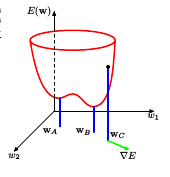

Fig.5 Geometrical view of the error function E(w) as a surface sitting over weight space. Point wA is a local minimum and wB is the global minimum. At any point wC , the local gradient of the error surface is given by the vector ∇E.

### Maximum Likelihood and Error Functions in Neural Networks

#### Maximum Likelihood Solution

To determine the optimal weights $ \mathbf{w}_{ML} $, we minimize the error function $ E(\mathbf{w}) $, which corresponds to the negative log-likelihood.

### Regression Case

For regression, the error function takes the form:

$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left( y(\mathbf{x}_n, \mathbf{w}) - t_n \right)^2
$$

After finding $ \mathbf{w}_{ML} $, the noise precision parameter $ \beta $ is estimated as:

$$
\beta_{ML} = \frac{1}{\frac{1}{N} \sum_{n=1}^N \left( y(\mathbf{x}_n, \mathbf{w}_{ML}) - t_n \right)^2}
$$

For multiple target variables $ K $, the error function becomes:

$$
\beta_{ML} = \frac{NK}{\sum_{n=1}^N \sum_{k=1}^K \left( y_k(\mathbf{x}_n, \mathbf{w}_{ML}) - t_{nk} \right)^2}
$$

### Binary Classification

For binary classification, we use the logistic sigmoid activation:

$$
y(\mathbf{x}, \mathbf{w}) = \sigma(a) = \frac{1}{1 + \exp(-a)}
$$

The conditional probability for class $ C_1 $ is:

$$
p(C_1 | \mathbf{x}, \mathbf{w}) = y(\mathbf{x}, \mathbf{w})
$$

and for class $ C_2 $:

$$
p(C_2 | \mathbf{x}, \mathbf{w}) = 1 - y(\mathbf{x}, \mathbf{w})
$$

The Bernoulli likelihood for targets \( t \) is:

$$
p(t | \mathbf{x}, \mathbf{w}) = y(\mathbf{x}, \mathbf{w})^t (1 - y(\mathbf{x}, \mathbf{w}))^{1-t}
$$

#### Cross-Entropy Error Function

The corresponding error function is:

$$
E(\mathbf{w}) = -\sum_{n=1}^N \left[ t_n \ln y_n + (1 - t_n) \ln (1 - y_n) \right]
$$

### Multiclass Classification

For $ K $ mutually exclusive classes, the softmax function for output activations is:

$$
y_k(\mathbf{x}, \mathbf{w}) = \frac{\exp(a_k)}{\sum_{j=1}^K \exp(a_j)}
$$

The error function is:

$$
E(\mathbf{w}) = -\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln y_k(\mathbf{x}_n, \mathbf{w})
$$

### Error Function and Gradient

For all cases, the gradient of the error function with respect to the activation $ a_k $ is:

$$
\frac{\partial E}{\partial a_k} = y_k - t_k
$$


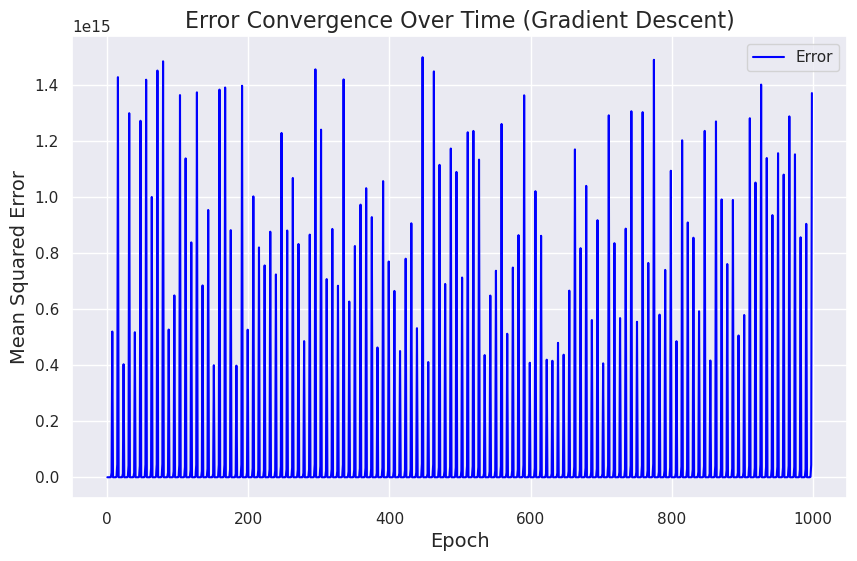

Trained weight: -0.0987101049678778
Trained bias: 0.06977754729426366


In [7]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data (1D regression)
def generate_data(N):
    X = [i for i in range(N)]
    y_true = [3 * x + 5 + random.gauss(0, 1) for x in X]  # Linear relation with noise
    return X, y_true

# Initialize weights and bias
def initialize_weights():
    return random.uniform(-1, 1), random.uniform(-1, 1)

# Linear model (y = w * x + b)
def predict(X, weight, bias):
    return [weight * x + bias for x in X]

# Mean Squared Error
def compute_error(y_pred, y_true):
    return sum([(pred - true) ** 2 for pred, true in zip(y_pred, y_true)]) / len(y_true)

# Compute gradients for weight and bias
def compute_gradients(X, y_pred, y_true):
    dw = sum([(pred - true) * x for pred, true, x in zip(y_pred, y_true, X)]) * 2 / len(y_true)
    db = sum([(pred - true) for pred, true in zip(y_pred, y_true)]) * 2 / len(y_true)
    return dw, db

# Gradient Descent to update weights and bias
def gradient_descent(X, y_true, weight, bias, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        # Forward pass: Predict the output
        y_pred = predict(X, weight, bias)
        
        # Calculate the error (Mean Squared Error)
        error = compute_error(y_pred, y_true)
        errors.append(error)
        
        # Compute gradients
        dw, db = compute_gradients(X, y_pred, y_true)

        # Check for any extremely large gradients and adjust the learning rate
        if abs(dw) > 1000 or abs(db) > 1000:
            print(f"Warning: large gradient at epoch {epoch}, dw: {dw}, db: {db}")
        
        # Update weights and bias with gradient descent
        weight -= learning_rate * dw
        bias -= learning_rate * db
        
        # Avoid numerical overflow by clipping values
        if abs(weight) > 1e6 or abs(bias) > 1e6:
            print("Warning: overflow in weights/bias, resetting.")
            weight, bias = initialize_weights()

    return weight, bias, errors

# Generate data
N = 100  # Number of data points
X, y_true = generate_data(N)

# Initialize weights and bias
weight, bias = initialize_weights()

# Hyperparameters
learning_rate = 0.001  # Lower learning rate to avoid overflow
epochs = 1000

# Train the model
weight, bias, errors = gradient_descent(X, y_true, weight, bias, learning_rate, epochs)

# Plot the error convergence using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(errors, label="Error", color="blue")
plt.title("Error Convergence Over Time (Gradient Descent)", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.legend()
plt.show()

# Output the trained weights and bias
print(f"Trained weight: {weight}")
print(f"Trained bias: {bias}")


##  Parameter Optimization

We turn next to the task of finding a weight vector $ \mathbf{w} $ which minimizes the chosen function $ E(\mathbf{w}) $. At this point, it is useful to have a geometrical picture of the error function, which we can view as a surface sitting over weight space as shown in Figure 5.5. 

First note that if we make a small step in weight space from $ \mathbf{w} $ to $ \mathbf{w} + \delta\mathbf{w} $, then the change in the error function is:

$$
\delta E \approx \delta\mathbf{w}^T \nabla E(\mathbf{w}),
$$

where the vector $ \nabla E(\mathbf{w}) $ points in the direction of greatest rate of increase of the error function. Because the error $ E(\mathbf{w}) $ is a smooth continuous function of $ \mathbf{w} $, its smallest value will occur at a point in weight space such that the gradient of the error function vanishes:

$$
\nabla E(\mathbf{w}) = 0 \tag{5.26}
$$

As otherwise we could make a small step in the direction of $ -\nabla E(\mathbf{w}) $ and thereby further reduce the error. Points at which the gradient vanishes are called stationary points, and may be further classified into minima, maxima, and saddle points.

Our goal is to find a vector $ \mathbf{w} $ such that $ E(\mathbf{w}) $ takes its smallest value. However, the error function typically has a highly nonlinear dependence on the weights and bias parameters, and so there will be many points in weight space at which the gradient vanishes (or is numerically very small).

Indeed, from the discussion in Section 5.1.1, we see that for any point $ \mathbf{w} $ that is a local minimum, there will be other points in weight space that are equivalent minima. For instance, in a two-layer network of the kind shown in Figure 5.1, with $ M $ hidden units, each point in weight space is a member of a family of $ M!2^M $ equivalent points.

Furthermore, there will typically be multiple inequivalent stationary points and in particular multiple inequivalent minima. A minimum that corresponds to the smallest value of the error function for any weight vector is said to be a **global minimum**. Any other minima corresponding to higher values of the error function are said to be **local minima**.

For a successful application of neural networks, it may not be necessary to find the global minimum (and in general it will not be known whether the global minimum has been found) but it may be necessary to compare several local minima in order to find a sufficiently good solution.

Because there is clearly no hope of finding an analytical solution to the equation $ \nabla E(\mathbf{w}) = 0 $, we resort to iterative numerical procedures. The optimization of continuous nonlinear functions is a widely studied problem and there exists an extensive literature on how to solve it efficiently. Most techniques involve choosing some initial value $ \mathbf{w}^{(0)} $ for the weight vector and then moving through weight space in a succession of steps of the form:

$$
\mathbf{w}^{(\tau + 1)} = \mathbf{w}^{(\tau)} + \Delta \mathbf{w}^{(\tau)} \tag{5.27}
$$

where $ \tau $ labels the iteration step. Different algorithms involve different choices for the weight vector update $ \Delta \mathbf{w}^{(\tau)} $. Many algorithms make use of gradient information and therefore require that, after each update, the value of $ \nabla E(\mathbf{w}) $ is evaluated at the new weight vector $ \mathbf{w}^{(\tau + 1)} $.

In order to understand the importance of gradient information, it is useful to consider a local approximation to the error function based on a Taylor expansion, where cubic and higher terms have been omitted. Here, $ \mathbf{b} $ is defined to be the gradient of $ E $ evaluated at $ \mathbf{w} $:

$$
\mathbf{b} \equiv \nabla E \big|_{\mathbf{w} = \mathbf{w}_b} \tag{5.29}
$$

and the Hessian matrix $ H = \nabla \nabla E $ has elements:

$$
H_{ij} \equiv \frac{\partial^2 E}{\partial w_i \partial w_j} \big|_{\mathbf{w} = \mathbf{w}_b} \tag{5.30}
$$

From (5.28), the corresponding local approximation to the gradient is given by:

$$
\nabla E \approx \mathbf{b} + H(\mathbf{w} - \mathbf{w}_b). \tag{5.31}
$$

For points $ \mathbf{w} $ that are sufficiently close to $ \mathbf{w}_b $, these expressions will give reasonable approximations for the error and its gradient.

Consider the particular case of a local quadratic approximation around a point $ \mathbf{w}_b $ that is a minimum of the error function. In this case, there is no linear term, because $ \nabla E = 0 $ at $ \mathbf{w}_b $, and (5.28) becomes:

$$
E(\mathbf{w}) = E(\mathbf{w}_b) + \frac{1}{2} (\mathbf{w} - \mathbf{w}_b)^T H (\mathbf{w} - \mathbf{w}_b). \tag{5.32}
$$

In order to interpret this geometrically, consider the eigenvalue equation for the Hessian matrix:

$$
H u_i = \lambda_i u_i, \tag{5.33}
$$

where the eigenvectors $ u_i $ form a complete orthonormal set, so that:

$$
u_i^T u_j = \delta_{ij}. \tag{5.34}
$$

We now expand $ (\mathbf{w} - \mathbf{w}_b) $ as a linear combination of the eigenvectors in the form:

$$
\mathbf{w} - \mathbf{w}_b = \sum_i \alpha_i u_i. \tag{5.35}
$$

This can be regarded as a transformation of the coordinate system in which the origin is translated to the point $ \mathbf{w}_b $, and the axes are rotated to align with the eigenvectors (through the orthogonal matrix whose columns are the $ u_i $).

Substituting (5.35) into (5.32), and using (5.33) and (5.34), allows the error function to be written in the form:

$$
E(\mathbf{w}) = E(\mathbf{w}_b) + \frac{1}{2} \sum_i \lambda_i \alpha_i^2. \tag{5.36}
$$

A matrix $ H $ is said to be **positive definite** if, and only if:

$$
\mathbf{v}^T H \mathbf{v} > 0 \quad \text{for all} \quad \mathbf{v}. \tag{5.37}
$$

In the neighborhood of a minimum $ \mathbf{w}_b $, the error function can be approximated by a quadratic. Contours of constant error are then ellipses whose axes are aligned with the eigenvectors $ u_i $ of the Hessian matrix, with lengths that are inversely proportional to the square roots of the corresponding eigenvalues $ \lambda_i $, as illustrated in Fig.6.

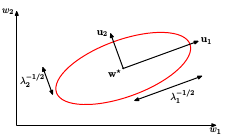

Fig.6 In the neighbourhood of a min- imum w , the error function can be approximated by a quadratic. Contours of con- stant error are then ellipses whose axes are aligned with the eigenvectors ui of the Hes- sian matrix, with lengths that are inversely proportional to the square roots of the correspond- ing eigenvectors λi .
For a one-dimensional weight space, a stationary point $ \mathbf{w}_b $ will be a minimum if:

$$
\frac{\partial^2 E}{\partial w^2} > 0. \tag{5.40}
$$

The corresponding result in $ D $-dimensions is that the Hessian matrix, evaluated at $ \mathbf{w}_b $, should be **positive definite**.


Epoch 0: Error = 165.3919
Epoch 10: Error = 135.2752
Epoch 20: Error = 110.6425
Epoch 30: Error = 90.4953
Epoch 40: Error = 74.0167
Epoch 50: Error = 60.5388
Epoch 60: Error = 49.5151
Epoch 70: Error = 40.4987
Epoch 80: Error = 33.1242
Epoch 90: Error = 27.0925


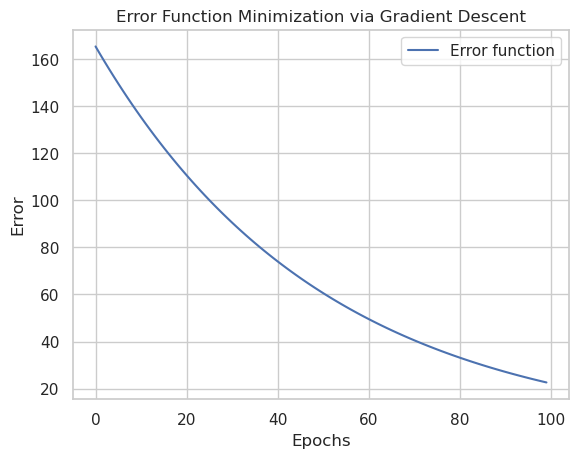

Final weights: [1.4509514880901553, 2.0849191468169255, 3.352854464270468, 4.620789781724008, 7.156660416631087, 8.42459573408463]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for the plot
sns.set(style="whitegrid")

# Define the quadratic error function and its gradient
def error_function(w, t):
    """
    A simple quadratic error function:
    E(w) = 1/2 * sum((w_i - t_i)^2)
    where w is the weight vector and t is the target vector.
    """
    return sum([(w_i - t_i) ** 2 for w_i, t_i in zip(w, t)]) / 2

def gradient(w, t):
    """
    Gradient of the error function with respect to the weight vector w.
    """
    return [w_i - t_i for w_i, t_i in zip(w, t)]

# Gradient descent implementation
def gradient_descent(t, learning_rate=0.01, epochs=100, initial_w=None):
    """
    Perform gradient descent to minimize the error function.
    Arguments:
    - t: Target values (known as t_i).
    - learning_rate: Step size for each iteration.
    - epochs: Number of iterations for gradient descent.
    - initial_w: Initial weight vector (default is None).
    Returns:
    - w: The final weight vector after optimization.
    - errors: List of error values over iterations.
    """
    # Initialize weights randomly if not provided
    if initial_w is None:
        w = [0.5] * len(t)  # Starting weights (example)
    else:
        w = initial_w
    
    errors = []  # To keep track of the error at each step
    
    for epoch in range(epochs):
        grad = gradient(w, t)
        # Update weights using the gradient
        w = [w_i - learning_rate * grad_i for w_i, grad_i in zip(w, grad)]
        # Compute the error after the update
        error = error_function(w, t)
        errors.append(error)
        
        # Print out the progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Error = {error:.4f}")
    
    return w, errors

# Target values (for example purposes)
t = [2, 3, 5, 7, 11, 13]  # Some target values

# Perform gradient descent
final_weights, error_history = gradient_descent(t, learning_rate=0.01, epochs=100)

# Plot the error history over epochs
plt.plot(error_history, label="Error function")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Function Minimization via Gradient Descent")
plt.legend()
plt.show()

# Output final weights
print(f"Final weights: {final_weights}")


##  Use of Gradient Information

As we shall see in Section 5.3, it is possible to evaluate the gradient of an error function efficiently by means of the backpropagation procedure. The use of this gradient information can lead to significant improvements in the speed with which the minima of the error function can be located.

We can see why this is so, as follows. In the quadratic approximation to the error function, given in (5.28), the error surface is specified by the quantities $ \mathbf{b} $ and $ \mathbf{H} $, which contain a total of $ \frac{W(W + 3)}{2} $ independent elements (because the matrix $ \mathbf{H} $ is symmetric), where $ W $ is the dimensionality of $ \mathbf{w} $ (i.e., the total number of adaptive parameters in the network). The location of the minimum of this quadratic approximation therefore depends on $ O(W^2) $ parameters, and we should not expect to be able to locate the minimum until we have gathered $ O(W^2) $ independent pieces of information. 

If we do not make use of gradient information, we would expect to have to perform $ O(W^2) $ function evaluations, each of which would require $ O(W) $ steps. Thus, the computational effort needed to find the minimum using such an approach would be $ O(W^3) $.

Now compare this with an algorithm that makes use of the gradient information. Because each evaluation of $ \nabla E $ brings $ W $ items of information, we might hope to find the minimum of the function in $ O(W) $ gradient evaluations. As we shall see, by using error backpropagation, each such evaluation takes only $ O(W) $ steps and so the minimum can now be found in $ O(W^2) $ steps. For this reason, the use of gradient information forms the basis of practical algorithms for training neural networks.

##  Gradient Descent Optimization

The simplest approach to using gradient information is to choose the weight update in (5.27) to comprise a small step in the direction of the negative gradient, so that:

$$
\mathbf{w}(\tau + 1) = \mathbf{w}(\tau) - \eta \nabla E(\mathbf{w}(\tau))
$$

where the parameter $ \eta > 0 $ is known as the learning rate. After each such update, the gradient is re-evaluated for the new weight vector and the process is repeated. Note that the error function is defined with respect to a training set, and so each step requires that the entire training set be processed in order to evaluate $ \nabla E $. Techniques that use the whole data set at once are called batch methods. At each step, the weight vector is moved in the direction of the greatest rate of decrease of the error function, and so this approach is known as gradient descent or steepest descent.

Although such an approach might intuitively seem reasonable, in fact, it turns out to be a poor algorithm, for reasons discussed in Bishop and Nabney (2008). For batch optimization, there are more efficient methods, such as conjugate gradients and quasi-Newton methods, which are much more robust and much faster than simple gradient descent (Gill et al., 1981; Fletcher, 1987; Nocedal and Wright, 1999). Unlike gradient descent, these algorithms have the property that the error function always decreases at each iteration unless the weight vector has arrived at a local or global minimum.

In order to find a sufficiently good minimum, it may be necessary to run a gradient-based algorithm multiple times, each time using a different randomly chosen starting point, and comparing the resulting performance on an independent validation set.

There is, however, an online version of gradient descent that has proved useful in practice for training neural networks on large data sets (Le Cun et al., 1989). Error functions based on maximum likelihood for a set of independent observations comprise a sum of terms, one for each data point:

$$
E(\mathbf{w}) = \sum_{n=1}^{N} E_n (\mathbf{w})
$$

### Online Gradient Descent

Online gradient descent, also known as sequential gradient descent or stochastic gradient descent, makes an update to the weight vector based on one data point at a time, so that:

$$
\mathbf{w}(\tau + 1) = \mathbf{w}(\tau) - \eta \nabla E_n (\mathbf{w}(\tau))
$$

This update is repeated by cycling through the data either in sequence or by selecting points at random with replacement. There are of course intermediate scenarios in which the updates are based on batches of data points.

One advantage of online methods compared to batch methods is that the former handle redundancy in the data much more efficiently. To see this, consider an extreme example in which we take a data set and double its size by duplicating every data point. Note that this simply multiplies the error function by a factor of 2 and so is equivalent to using the original error function. Batch methods will require double the computational effort to evaluate the batch error function gradient, whereas online methods will be unaffected.

Another property of online gradient descent is the possibility of escaping from local minima, since a stationary point with respect to the error function for the whole data set will generally not be a stationary point for each data point individually.

Nonlinear optimization algorithms, and their practical application to neural network training, are discussed in detail in Bishop and Nabney (2008).


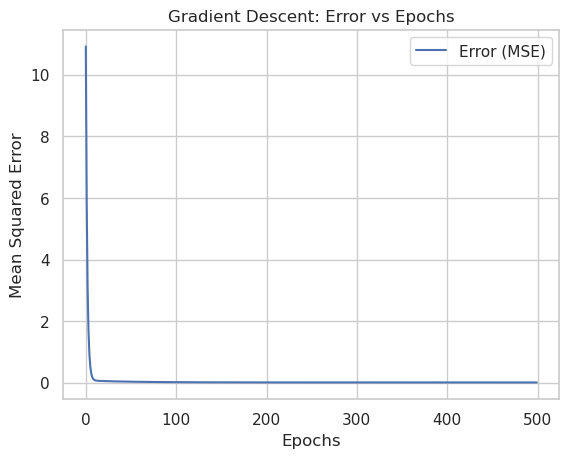

Final weights: [2.903291755970197]
Final bias: 2.0579253701871654


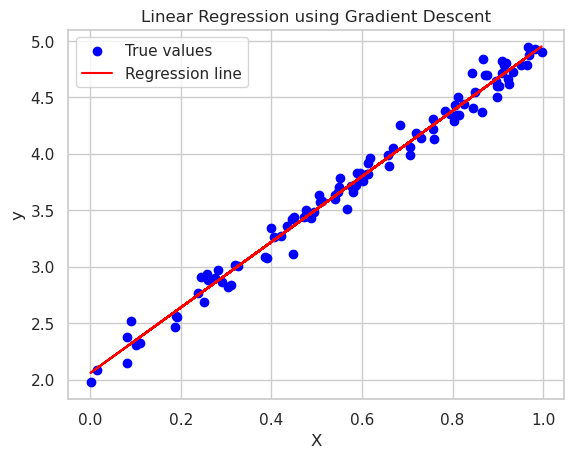

In [9]:
import random
import matplotlib.pyplot as plt

# Mean Squared Error (MSE) Function
def compute_error(y_pred, y_true):
    error = 0
    for i in range(len(y_true)):
        error += (y_pred[i] - y_true[i]) ** 2
    return error / len(y_true)

# Gradient of the Mean Squared Error
def compute_gradients(X, y_true, y_pred):
    dw = [0] * len(X[0])  # Initialize gradient for weights
    db = 0  # Initialize gradient for bias

    for i in range(len(X)):
        error = y_pred[i] - y_true[i]
        for j in range(len(X[0])):
            dw[j] += 2 * error * X[i][j]
        db += 2 * error

    # Average the gradients over all data points
    dw = [d / len(X) for d in dw]
    db /= len(X)
    return dw, db

# Batch Gradient Descent for Linear Regression
def gradient_descent(X, y_true, learning_rate=0.01, epochs=1000):
    # Initialize weights and bias
    weights = [random.random() for _ in range(len(X[0]))]  # Random initialization
    bias = random.random()
    error_list = []
    
    # Perform gradient descent
    for epoch in range(epochs):
        y_pred = [sum([X[i][j] * weights[j] for j in range(len(X[0]))]) + bias for i in range(len(X))]  # Predicted values
        error = compute_error(y_pred, y_true)
        error_list.append(error)

        # Compute gradients
        dw, db = compute_gradients(X, y_true, y_pred)

        # Update weights and bias using the gradients
        weights = [w - learning_rate * dw[i] for i, w in enumerate(weights)]
        bias -= learning_rate * db
        
    return weights, bias, error_list

# Generating synthetic data
random.seed(0)
X = [[random.random()] for _ in range(100)]  # 100 data points, single feature
y_true = [3 * X[i][0] + 2 + random.gauss(0, 0.1) for i in range(100)]  # Linear relationship with noise

# Run Gradient Descent
learning_rate = 0.1
epochs = 500
weights, bias, error_list = gradient_descent(X, y_true, learning_rate, epochs)

# Plotting the error curve (MSE vs Epochs)
plt.plot(range(epochs), error_list, label="Error (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent: Error vs Epochs")
plt.legend()
plt.show()

# Display final weights and bias
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

# Plotting the regression line
y_pred = [sum([X[i][j] * weights[j] for j in range(len(X[0]))]) + bias for i in range(len(X))]
plt.scatter([x[0] for x in X], y_true, color="blue", label="True values")
plt.plot([x[0] for x in X], y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()


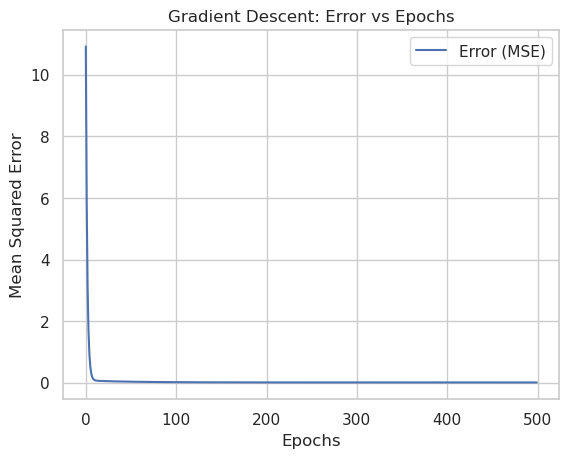

Final weights: [2.903291755970197]
Final bias: 2.0579253701871654


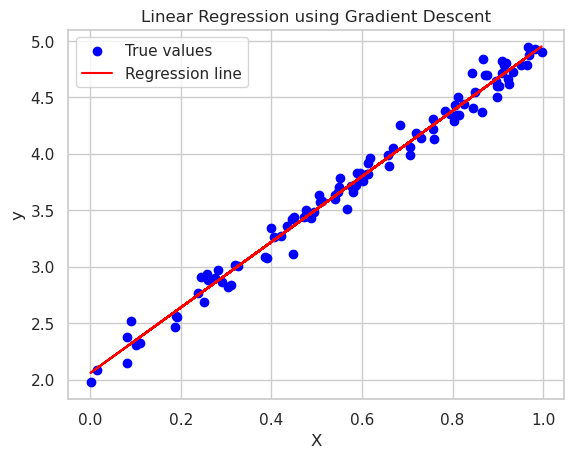

In [10]:
import random
import matplotlib.pyplot as plt

# Mean Squared Error (MSE) Function
def compute_error(y_pred, y_true):
    error = 0
    for i in range(len(y_true)):
        error += (y_pred[i] - y_true[i]) ** 2
    return error / len(y_true)

# Gradient of the Mean Squared Error
def compute_gradients(X, y_true, y_pred):
    dw = [0] * len(X[0])  # Initialize gradient for weights
    db = 0  # Initialize gradient for bias

    for i in range(len(X)):
        error = y_pred[i] - y_true[i]
        for j in range(len(X[0])):
            dw[j] += 2 * error * X[i][j]
        db += 2 * error

    # Average the gradients over all data points
    dw = [d / len(X) for d in dw]
    db /= len(X)
    return dw, db

# Batch Gradient Descent for Linear Regression
def gradient_descent(X, y_true, learning_rate=0.01, epochs=1000):
    # Initialize weights and bias
    weights = [random.random() for _ in range(len(X[0]))]  # Random initialization
    bias = random.random()
    error_list = []
    
    # Perform gradient descent
    for epoch in range(epochs):
        y_pred = [sum([X[i][j] * weights[j] for j in range(len(X[0]))]) + bias for i in range(len(X))]  # Predicted values
        error = compute_error(y_pred, y_true)
        error_list.append(error)

        # Compute gradients
        dw, db = compute_gradients(X, y_true, y_pred)

        # Update weights and bias using the gradients
        weights = [w - learning_rate * dw[i] for i, w in enumerate(weights)]
        bias -= learning_rate * db
        
    return weights, bias, error_list

# Generating synthetic data
random.seed(0)
X = [[random.random()] for _ in range(100)]  # 100 data points, single feature
y_true = [3 * X[i][0] + 2 + random.gauss(0, 0.1) for i in range(100)]  # Linear relationship with noise

# Run Gradient Descent
learning_rate = 0.1
epochs = 500
weights, bias, error_list = gradient_descent(X, y_true, learning_rate, epochs)

# Plotting the error curve (MSE vs Epochs)
plt.plot(range(epochs), error_list, label="Error (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent: Error vs Epochs")
plt.legend()
plt.show()

# Display final weights and bias
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

# Plotting the regression line
y_pred = [sum([X[i][j] * weights[j] for j in range(len(X[0]))]) + bias for i in range(len(X))]
plt.scatter([x[0] for x in X], y_true, color="blue", label="True values")
plt.plot([x[0] for x in X], y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()


## Backpropagation and Gradient Computation

Our goal is to efficiently compute the gradient of an error function $ E(w) $ for a feed-forward neural network using **backpropagation**. This involves two stages:
1. **Forward Propagation**: Calculate activations for all units in the network given an input.
2. **Backpropagation**: Evaluate the derivatives of the error function with respect to the weights using the chain rule.

###  Evaluation of Error-Function Derivatives

For a network with arbitrary feed-forward topology, differentiable activation functions, and a broad class of error functions, we need to evaluate the derivatives of the error function with respect to the weights. 

For simplicity, let's consider a linear model where the outputs $ y_k $ are linear combinations of the input variables $ x_i $:
$$
y_k = w_{ki} x_i
$$
Here, $ y_k $ is the output, and $ w_{ki} $ represents the weight associated with the connection from the input $ x_i $ to the output $ y_k $.

The error function for a particular input pattern $ n $ can be expressed as:
$$
E_n = \frac{1}{2} \sum_k (y_k - t_k)^2
$$
where \( t_k \) is the target value for the output $ y_k $, and $ E_n $ is the error for the \(n\)-th training pattern.

#### Gradient of the Error Function

The gradient of this error function with respect to a weight $ w_{ji} $ is computed as:
$$
\frac{\partial E_n}{\partial w_{ji}} = (y_j - t_j) x_{ni}
$$
This expression can be interpreted as a local computation involving the product of:
- The error signal $ (y_j - t_j) $ associated with the output unit $ j $,
- The input value $ x_{ni} $ associated with the input unit $i $.

This result extends naturally to more complex networks.

### General Case: Multilayer Feed-Forward Networks

In a general multilayer feed-forward network, each unit computes a weighted sum of its inputs:
$$
a_j = \sum_i w_{ji} z_i
$$
where $ z_i $ represents the activation of the units that send connections to unit $ j $, and $ w_{ji} $ is the weight associated with the connection from unit $ i $ to unit $ j $. The sum $ a_j $ is transformed by a nonlinear activation function $ h(a_j) $ to give the activation $ z_j $ of unit $ j $:
$$
z_j = h(a_j)
$$

For each pattern in the training set, the activations of all hidden and output units are computed through forward propagation.

### Chain Rule for Derivatives

Now, consider the derivative of the error function $ E_n $ with respect to a weight $ w_{ji} $. The error function depends on $ w_{ji} $ only through the summed input $ a_j $ to unit $ j $, so we apply the chain rule:
$$
\frac{\partial E_n}{\partial w_{ji}} = \frac{\partial E_n}{\partial a_j} \cdot \frac{\partial a_j}{\partial w_{ji}}
$$

Let us introduce a useful notation for the error term:
$$
\delta_j = \frac{\partial E_n}{\partial a_j}
$$
This term $ \delta_j $ is often referred to as the **error** for unit $ j $.

### Derivative of $ a_j $ with Respect to $ w_{ji} $

From the weighted sum equation, we have:
$$
\frac{\partial a_j}{\partial w_{ji}} = z_i
$$

Thus, the derivative of $ E_n $ with respect to $ w_{ji} $ becomes:
$$
\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i
$$

This equation shows that the gradient is obtained by multiplying the error term $ \delta_j $ of unit $ j $ by the activation $ z_i $ of unit $ i $ (where $ z = 1 $ for a bias unit).

### Error Term for Output Units

For the output units, the error term $ \delta_k $ is given by:
$$
\delta_k = y_k - t_k
$$
where \( y_k \) is the output of the network and $ t_k 4 is the target value.

Thus, for the output layer:
$$
\delta_k = (y_k - t_k)
$$

### Error Backpropagation Algorithm

In practice, the backpropagation algorithm proceeds by:
1. **Forward propagation**: Compute activations for all units in the network using the input pattern.
2. **Backpropagation**: Compute the error terms $ \delta_j $ for the output and hidden layers, using the chain rule.
3. **Weight update**: Use the gradients computed via backpropagation to adjust the weights and minimize the error function.

This method is applied iteratively to adjust the weights in order to minimize the total error across all training patterns.

### Summary

- Backpropagation is a two-stage process involving forward propagation to compute activations and backward propagation to compute the gradients of the error function.
- The key result is that the gradient of the error function with respect to a weight $ w_{ji} $ is given by:
$$
\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i
$$
where $ \delta_j $ is the error term for unit $ j $, and $ z_i $ is the activation of unit $ i $.


In [11]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Sum-of-squares error function
def compute_error(y, t):
    return np.sum(0.5 * (y - t) ** 2)

# Backpropagation algorithm
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights with random values
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Weights initialization
        self.w1 = np.random.randn(self.input_size, self.hidden_size)  # Weights between input and hidden layer
        self.w2 = np.random.randn(self.hidden_size, self.output_size)  # Weights between hidden and output layer
        
        # Biases initialization
        self.b1 = np.zeros((1, self.hidden_size))  # Bias for hidden layer
        self.b2 = np.zeros((1, self.output_size))  # Bias for output layer

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.w1) + self.b1
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.output_input = np.dot(self.hidden_output, self.w2) + self.b2
        self.output = sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, X, y):
        # Compute error (difference between predicted and actual output)
        output_error = self.output - y
        
        # Compute the gradient for output layer
        output_delta = output_error * sigmoid_derivative(self.output)
        
        # Compute error for hidden layer
        hidden_error = output_delta.dot(self.w2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Gradients for weights and biases
        d_w2 = self.hidden_output.T.dot(output_delta)
        d_b2 = np.sum(output_delta, axis=0, keepdims=True)
        d_w1 = X.T.dot(hidden_delta)
        d_b1 = np.sum(hidden_delta, axis=0, keepdims=True)
        
        # Update weights and biases using gradient descent
        self.w1 -= self.learning_rate * d_w1
        self.w2 -= self.learning_rate * d_w2
        self.b1 -= self.learning_rate * d_b1
        self.b2 -= self.learning_rate * d_b2
    
    def train(self, X, y, epochs=1000):
        # Training loop
        for epoch in range(epochs):
            self.forward(X)  # Perform forward propagation
            self.backward(X, y)  # Perform backward propagation (update weights)
            
            if epoch % 100 == 0:  # Print error every 100 epochs
                error = compute_error(self.output, y)
                print(f"Epoch {epoch}, Error: {error}")

# Example Usage
if __name__ == "__main__":
    # Training data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
    y = np.array([[0], [1], [1], [0]])  # Target output

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
    nn.train(X, y, epochs=1000)
    
    # Test the trained network
    predictions = nn.forward(X)
    print("\nPredictions after training:")
    print(predictions)


Epoch 0, Error: 0.6098636085273264
Epoch 100, Error: 0.491219610544137
Epoch 200, Error: 0.48093126359412885
Epoch 300, Error: 0.47044803328176155
Epoch 400, Error: 0.45785166183119963
Epoch 500, Error: 0.44160765823061676
Epoch 600, Error: 0.42046899234619467
Epoch 700, Error: 0.3936843760710074
Epoch 800, Error: 0.3613498766301246
Epoch 900, Error: 0.3246627354153632

Predictions after training:
[[0.3228689 ]
 [0.61692329]
 [0.6110657 ]
 [0.41155147]]


## Backpropagation Derivation

## Backpropagation for Hidden Units

The calculation of $\delta_j$ for hidden unit $j$ during backpropagation is derived using the chain rule. The error $\delta_j$ for a hidden unit is given by the following equation:

$$
\delta_j = \frac{\partial E_n}{\partial a_j} = \sum_k \frac{\partial E_n}{\partial a_k} \cdot \frac{\partial a_k}{\partial z_j} \cdot \frac{\partial z_j}{\partial a_j}
$$

Where the sum runs over all units $k$ that are connected to unit $j$, and the various partial derivatives correspond to:

- $ \frac{\partial E_n}{\partial a_k} $ is the error propagated back from the output units, $ \delta_k $
- $ \frac{\partial a_k}{\partial z_j} $ is the weight $w_{kj}$
- $ \frac{\partial z_j}{\partial a_j} $ is the derivative of the activation function of the hidden layer

The final equation is then:

$$
\delta_j = h'(a_j) \sum_k w_{kj} \delta_k
$$

Where:

- $h'(a_j)$ is the derivative of the activation function $h$ applied at hidden unit $j$, such as the **tanh** function in this case.
- The summation is over all units $k$ that unit $j$ sends connections to (which could include other hidden units or output units).

### Steps for Backpropagation:

1. **Forward Pass**: Apply the input vector $x_n$ to the network and forward propagate through all layers using the following equations:

   $$
   a_j^{(1)} = \sum_i w_{ji} x_i + b_j \quad \text{(for hidden layer)}
   $$

   $$
   z_j = \tanh(a_j^{(1)}) \quad \text{(hidden layer activation)}
   $$

   $$
   a_k^{(2)} = \sum_j w_{kj} z_j + b_k \quad \text{(for output layer)}
   $$

   $$
   y_k = a_k^{(2)} \quad \text{(output layer, linear activation)}
   $$

2. **Calculate Error for Output Units**: Compute the error for each output unit $k$:

   $$
   \delta_k = y_k - t_k
   $$

   Where $y_k$ is the predicted output and $t_k$ is the target output.

3. **Backpropagate Errors to Hidden Units**: For each hidden unit \(j\), propagate the error $\delta_k$ backward from the output layer to the hidden layer using the formula:

   $$
   \delta_j = (1 - z_j^2) \sum_k w_{kj} \delta_k
   $$

4. **Compute Weight Gradients**: Use the error terms to compute the gradients with respect to the weights:

   $$
   \frac{\partial E_n}{\partial w_{ji}} = \delta_j x_i
   $$

   $$
   \frac{\partial E_n}{\partial w_{kj}} = \delta_k z_j
   $$

5. **Weight Update**: Update the weights using gradient descent:

   $$
   w_{ji} \leftarrow w_{ji} - \eta \frac{\partial E_n}{\partial w_{ji}}
   $$

   $$
   w_{kj} \leftarrow w_{kj} - \eta \frac{\partial E_n}{\partial w_{kj}}
   $$

Where \(\eta\) is the learning rate.

## Example with Tanh Activation

For a simple two-layer network with logistic sigmoid activation in the hidden layer and a linear activation function in the output layer, we use the following activation functions and their derivatives:

- Hidden layer: $ h(a) = \tanh(a) $
- Derivative: $ h'(a) = 1 - h(a)^2 $
- Output layer: Linear activation: $ y_k = a_k^{(2)} $

The error function is the sum of squared errors:

$$
E_n = \frac{1}{2} \sum_k (y_k - t_k)^2
$$

### Forward Pass:

1. Compute the weighted sum for the hidden layer:

   $$
   a_j^{(1)} = \sum_i w_{ji} x_i + b_j
   $$

   Apply activation function:

   $$
   z_j = \tanh(a_j^{(1)})
   $$

2. Compute the weighted sum for the output layer:

   $$
   a_k^{(2)} = \sum_j w_{kj} z_j + b_k
   $$

   Apply output activation (linear):

   $$
   y_k = a_k^{(2)}
   $$

### Error Backpropagation:

1. For each output unit, calculate the error:

   $$
   \delta_k = y_k - t_k
   $$

2. For each hidden unit, propagate the error backward:

   $$
   \delta_j = (1 - z_j^2) \sum_k w_{kj} \delta_k
   $$

### Weight Gradients:

1. For the first-layer weights:

   $$
   \frac{\partial E_n}{\partial w_{ji}} = \delta_j x_i
   $$

2. For the second-layer weights:

   $$
   \frac{\partial E_n}{\partial w_{kj}} = \delta_k z_j
   $$

By applying this process iteratively for each pattern in the training set, the network's weights are updated to minimize the error.


In [17]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize the network's parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases with random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(self.output_size)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2

    def forward(self, X):
        # Forward propagation
        self.input_layer = X
        self.hidden_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.tanh(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  # Linear activation for the output layer
        return self.output

    def backward(self, X, y):
        # Backward propagation to update weights

        # Output layer error term (delta)
        output_error = self.output - y
        output_delta = output_error  # Since we are using linear activation, derivative is 1

        # Hidden layer error term (delta)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.tanh_derivative(self.hidden_input)

        # Compute gradients for weights and biases
        d_w2 = np.outer(self.hidden_output, output_delta)
        d_b2 = output_delta
        d_w1 = np.outer(self.input_layer, hidden_delta)
        d_b1 = hidden_delta

        # Update weights and biases using the gradients
        self.weights_input_hidden -= self.learning_rate * d_w1
        self.bias_hidden -= self.learning_rate * d_b1
        self.weights_hidden_output -= self.learning_rate * d_w2
        self.bias_output -= self.learning_rate * d_b2

    def train(self, X, y, epochs):
        # Training loop
        for epoch in range(epochs):
            for x, target in zip(X, y):
                self.forward(x)  # Perform forward propagation
                self.backward(x, target)  # Perform backward propagation (update weights)

            if epoch % 100 == 0:
                # Print error every 100 epochs
                error = np.mean(np.square(self.output - y))
                print(f"Epoch {epoch}/{epochs}, Error: {error}")

    def predict(self, X):
        # Predict the output for new input
        return self.forward(X)

# Example Usage:

# Example input (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
nn.train(X, y, epochs=1000)

# Test the trained network
predictions = nn.predict(X)
print("Predictions after training:", predictions)


Epoch 0/1000, Error: 0.2715161949983337
Epoch 100/1000, Error: 0.4973036756021141
Epoch 200/1000, Error: 0.49999831490816304
Epoch 300/1000, Error: 0.4999999989593569
Epoch 400/1000, Error: 0.49999999999935774
Epoch 500/1000, Error: 0.4999999999999998
Epoch 600/1000, Error: 0.4999999999999999
Epoch 700/1000, Error: 0.4999999999999999
Epoch 800/1000, Error: 0.4999999999999999
Epoch 900/1000, Error: 0.4999999999999999
Predictions after training: [[4.44089210e-16]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.22044605e-16]]


In [19]:
import math

# Define the sigmoid (tanh) activation function and its derivative
def sigmoid(x):
    return math.tanh(x)

def sigmoid_derivative(x):
    return 1 - x ** 2  # Since tanh(x)' = 1 - tanh(x)^2

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = [[0.5 for _ in range(input_size)] for _ in range(hidden_size)]  # input to hidden layer weights
        self.bias_hidden = [0.5 for _ in range(hidden_size)]  # hidden layer biases
        self.weights_hidden_output = [[0.5 for _ in range(hidden_size)] for _ in range(output_size)]  # hidden to output layer weights
        self.bias_output = [0.5 for _ in range(output_size)]  # output layer biases

        # Initialize activations
        self.hidden_output = [0.0 for _ in range(hidden_size)]  # Hidden layer outputs
        self.output = [0.0 for _ in range(output_size)]  # Output layer outputs

    def forward(self, x):
        # Forward propagation: input to hidden layer
        for j in range(self.hidden_size):
            self.hidden_output[j] = sigmoid(sum(x[i] * self.weights_input_hidden[j][i] for i in range(self.input_size)) + self.bias_hidden[j])

        # Forward propagation: hidden to output layer
        for k in range(self.output_size):
            self.output[k] = sum(self.hidden_output[j] * self.weights_hidden_output[k][j] for j in range(self.hidden_size)) + self.bias_output[k]

    def backward(self, X, y):
        # Backward propagation: Calculate error at output layer
        output_delta = [0.0 for _ in range(self.output_size)]
        for k in range(self.output_size):
            output_delta[k] = self.output[k] - y[k]

        # Calculate deltas for hidden layer
        hidden_delta = [0.0 for _ in range(self.hidden_size)]
        for j in range(self.hidden_size):
            hidden_delta[j] = sum(output_delta[k] * self.weights_hidden_output[k][j] for k in range(self.output_size)) * sigmoid_derivative(self.hidden_output[j])

        # Update weights and biases for the output layer
        for k in range(self.output_size):
            for j in range(self.hidden_size):
                self.weights_hidden_output[k][j] -= self.learning_rate * self.hidden_output[j] * output_delta[k]
            self.bias_output[k] -= self.learning_rate * output_delta[k]

        # Update weights and biases for the hidden layer
        for j in range(self.hidden_size):
            for i in range(self.input_size):
                self.weights_input_hidden[j][i] -= self.learning_rate * X[i] * hidden_delta[j]
            self.bias_hidden[j] -= self.learning_rate * hidden_delta[j]

    def train(self, X, y, epochs):
        # Training loop
        for epoch in range(epochs):
            for x, target in zip(X, y):
                self.forward(x)  # Perform forward propagation
                self.backward(x, target)  # Perform backward propagation (update weights)

            if epoch % 100 == 0:
                # Print error every 100 epochs
                error = sum((self.output[i] - target[i]) ** 2 for i in range(self.output_size)) / len(y)
                print(f"Epoch {epoch}/{epochs}, Error: {error}")

    def predict(self, X):
        predictions = []
        for x in X:
            self.forward(x)
            predictions.append(self.output)
        return predictions

# Example training data (XOR problem)
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [
    [0],
    [1],
    [1],
    [0]
]

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
nn.train(X, y, epochs=1000)

# Test the trained network
predictions = nn.predict(X)
for i, prediction in enumerate(predictions):
    print(f"Input: {X[i]} -> Predicted Output: {prediction}")


Epoch 0/1000, Error: 0.5722947296680032
Epoch 100/1000, Error: 0.13816604873314578
Epoch 200/1000, Error: 0.11231409547008203
Epoch 300/1000, Error: 0.08152136736934812
Epoch 400/1000, Error: 0.07481259843870298
Epoch 500/1000, Error: 0.07544697402400476
Epoch 600/1000, Error: 0.0757463320282159
Epoch 700/1000, Error: 0.07565708392244778
Epoch 800/1000, Error: 0.0753897411440255
Epoch 900/1000, Error: 0.07508533985175404
Input: [0, 0] -> Predicted Output: [0.49131092426211015]
Input: [0, 1] -> Predicted Output: [0.49131092426211015]
Input: [1, 0] -> Predicted Output: [0.49131092426211015]
Input: [1, 1] -> Predicted Output: [0.49131092426211015]


Epoch 0/1000, Error: 0.5722947296680032
Epoch 100/1000, Error: 0.13816604873314578
Epoch 200/1000, Error: 0.11231409547008203
Epoch 300/1000, Error: 0.08152136736934812
Epoch 400/1000, Error: 0.07481259843870298
Epoch 500/1000, Error: 0.07544697402400476
Epoch 600/1000, Error: 0.0757463320282159
Epoch 700/1000, Error: 0.07565708392244778
Epoch 800/1000, Error: 0.0753897411440255
Epoch 900/1000, Error: 0.07508533985175404


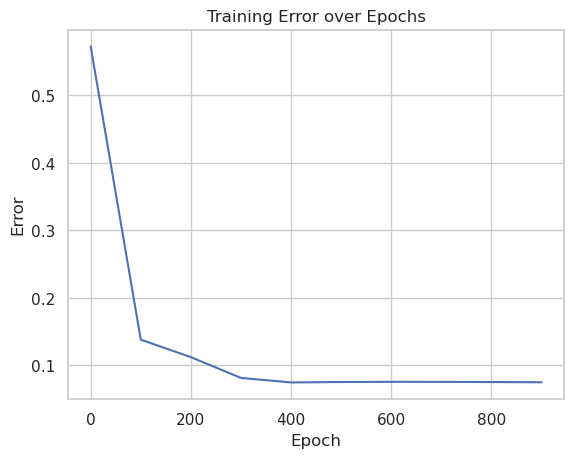

Input: [0, 0] -> Predicted Output: [0.49131092426211015]
Input: [0, 1] -> Predicted Output: [0.49131092426211015]
Input: [1, 0] -> Predicted Output: [0.49131092426211015]
Input: [1, 1] -> Predicted Output: [0.49131092426211015]


In [20]:
import math
import matplotlib.pyplot as plt

# Define the sigmoid (tanh) activation function and its derivative
def sigmoid(x):
    return math.tanh(x)

def sigmoid_derivative(x):
    return 1 - x ** 2  # Since tanh(x)' = 1 - tanh(x)^2

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = [[0.5 for _ in range(input_size)] for _ in range(hidden_size)]  # input to hidden layer weights
        self.bias_hidden = [0.5 for _ in range(hidden_size)]  # hidden layer biases
        self.weights_hidden_output = [[0.5 for _ in range(hidden_size)] for _ in range(output_size)]  # hidden to output layer weights
        self.bias_output = [0.5 for _ in range(output_size)]  # output layer biases

        # Initialize activations
        self.hidden_output = [0.0 for _ in range(hidden_size)]  # Hidden layer outputs
        self.output = [0.0 for _ in range(output_size)]  # Output layer outputs

    def forward(self, x):
        # Forward propagation: input to hidden layer
        for j in range(self.hidden_size):
            self.hidden_output[j] = sigmoid(sum(x[i] * self.weights_input_hidden[j][i] for i in range(self.input_size)) + self.bias_hidden[j])

        # Forward propagation: hidden to output layer
        for k in range(self.output_size):
            self.output[k] = sum(self.hidden_output[j] * self.weights_hidden_output[k][j] for j in range(self.hidden_size)) + self.bias_output[k]

    def backward(self, X, y):
        # Backward propagation: Calculate error at output layer
        output_delta = [0.0 for _ in range(self.output_size)]
        for k in range(self.output_size):
            output_delta[k] = self.output[k] - y[k]

        # Calculate deltas for hidden layer
        hidden_delta = [0.0 for _ in range(self.hidden_size)]
        for j in range(self.hidden_size):
            hidden_delta[j] = sum(output_delta[k] * self.weights_hidden_output[k][j] for k in range(self.output_size)) * sigmoid_derivative(self.hidden_output[j])

        # Update weights and biases for the output layer
        for k in range(self.output_size):
            for j in range(self.hidden_size):
                self.weights_hidden_output[k][j] -= self.learning_rate * self.hidden_output[j] * output_delta[k]
            self.bias_output[k] -= self.learning_rate * output_delta[k]

        # Update weights and biases for the hidden layer
        for j in range(self.hidden_size):
            for i in range(self.input_size):
                self.weights_input_hidden[j][i] -= self.learning_rate * X[i] * hidden_delta[j]
            self.bias_hidden[j] -= self.learning_rate * hidden_delta[j]

    def train(self, X, y, epochs):
        # To track the error for plotting
        errors = []
        
        # Training loop
        for epoch in range(epochs):
            total_error = 0
            for x, target in zip(X, y):
                self.forward(x)  # Perform forward propagation
                self.backward(x, target)  # Perform backward propagation (update weights)

            if epoch % 100 == 0:
                # Calculate error for the current epoch
                total_error = sum((self.output[i] - target[i]) ** 2 for i in range(self.output_size)) / len(y)
                errors.append(total_error)
                print(f"Epoch {epoch}/{epochs}, Error: {total_error}")
        
        # Return errors for plotting
        return errors

    def predict(self, X):
        predictions = []
        for x in X:
            self.forward(x)
            predictions.append(self.output)
        return predictions

# Example training data (XOR problem)
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [
    [0],
    [1],
    [1],
    [0]
]

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
errors = nn.train(X, y, epochs=1000)

# Plot the training error over epochs
plt.plot(range(0, 1000, 100), errors)
plt.title('Training Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Test the trained network
predictions = nn.predict(X)
for i, prediction in enumerate(predictions):
    print(f"Input: {X[i]} -> Predicted Output: {prediction}")


###  Efficiency of Backpropagation

One of the most important aspects of backpropagation is its computational efficiency. To understand this, let us examine how the number of computer operations required to evaluate the derivatives of the error function scales with the total number $ W $ of weights and biases in the network. A single evaluation of the error function (for a given input pattern) would require $ O(W) $ operations, for sufficiently large $ W $. This follows from the fact that, except for a network with very sparse connections, the number of weights is typically much greater than the number of units, and so the bulk of the computational effort in forward propagation is concerned with evaluating the sums in (5.48), with the evaluation of the activation functions representing a small overhead. Each term in the sum in (5.48) requires one multiplication and one addition, leading to an overall computational cost that is $ O(W) $.

An alternative approach to backpropagation for computing the derivatives of the error function is to use finite differences. This can be done by perturbing each weight in turn, and approximating the derivatives by the expression:

$$
\frac{\partial E_n}{\partial w_{ji}} = \frac{E_n(w_{ji} + \epsilon) - E_n(w_{ji})}{\epsilon} + O(\epsilon)
$$

where $ \epsilon $ is a small value. In a software simulation, the accuracy of the approximation to the derivatives can be improved by making $ \epsilon $ smaller, until numerical roundoff problems arise. The accuracy of the finite differences method can be improved significantly by using symmetrical central differences of the form:

$$
\frac{\partial E_n}{\partial w_{ji}} = \frac{E_n(w_{ji} + \epsilon) - E_n(w_{ji} - \epsilon)}{2\epsilon} + O(\epsilon^2)
$$

In this case, the $ O(\epsilon) $ corrections cancel, as can be verified by Taylor expansion on the right-hand side, and so the residual corrections are $ O(\epsilon^2) $. The number of computational steps is, however, roughly doubled compared with the previous approximation.

The main problem with numerical differentiation is that the highly desirable $ O(W) $ scaling has been lost. Each forward propagation requires $ O(W) $ steps, and since there are $ W $ weights in the network, each of which must be perturbed individually, the overall scaling is $ O(W^2) $.

However, numerical differentiation plays an important role in practice, because a comparison of the derivatives calculated by backpropagation with those obtained using central differences provides a powerful check on the correctness of any software implementation of the backpropagation algorithm. When training networks in practice, derivatives should be evaluated using backpropagation, because this gives the greatest accuracy and numerical efficiency. However, the results should be compared with numerical differentiation for some test cases in order to check the correctness of the implementation.

### 5.3.4 The Jacobian Matrix

We have seen how the derivatives of an error function with respect to the weights can be obtained by the propagation of errors backwards through the network. The technique of backpropagation can also be applied to the calculation of other derivatives. Here we consider the evaluation of the Jacobian matrix, whose elements are given by the derivatives of the network outputs with respect to the inputs:

$$
J_{ki} = \frac{\partial y_k}{\partial x_i}
$$

where each such derivative is evaluated with all other inputs held fixed. Jacobian matrices play a useful role in systems built from a number of distinct modules, as illustrated in Fig.8. Each module can comprise a fixed or adaptive function, which can be linear or nonlinear, so long as it is differentiable. Suppose we wish to minimize an error function $ E $ with respect to the parameter $ w $ in Figure 5.8. The derivative of the error function is given by:

$$
\frac{\partial E}{\partial w} = \sum_{k,j} \frac{\partial y_k}{\partial z_j} \frac{\partial z_j}{\partial w}
$$

where the Jacobian matrix for the red module in Figure 5.8 appears in the middle term. Because the Jacobian matrix provides a measure of the local sensitivity of the outputs to changes in each of the input variables, it also allows any known errors $ \Delta x_i $ associated with the inputs to be propagated through the trained network in order to estimate their contribution $ \Delta y_k $ to the errors at the outputs, through the relation:

$$
\Delta y_k = \sum_i \frac{\partial y_k}{\partial x_i} \Delta x_i
$$

This is valid provided the $ |\Delta x_i| $ are small. In general, the network mapping represented by a trained neural network will be nonlinear, and so the elements of the Jacobian matrix will not be constants but will depend on the particular input vector used. Thus, this relation is valid only for small perturbations of the inputs, and the Jacobian itself must be re-evaluated for each new input vector.

The Jacobian matrix can be evaluated using a backpropagation procedure that is similar to the one derived earlier for evaluating the derivatives of an error function with respect to the weights. We start by writing the element $ J_{ki} $ in the form:

$$
J_{ki} = \frac{\partial y_k}{\partial x_i} = \sum_j \frac{\partial y_k}{\partial a_j} \frac{\partial a_j}{\partial x_i}
$$

where we have made use of (5.48). The sum in the above expression runs over all units $ j $ to which the input unit $ i $ sends connections (for example, over all units in the first hidden layer in the layered topology considered earlier). We now write down a recursive backpropagation formula to determine the derivatives $ \frac{\partial y_k}{\partial a_j} $:

$$
\frac{\partial y_k}{\partial a_j} = \sum_l \frac{\partial y_k}{\partial a_l} \frac{\partial a_l}{\partial a_j}
$$

where the sum runs over all units $ l $ to which unit $ j $ sends connections (corresponding to the first index of $ w_{lj} $).

This backpropagation starts at the output units for which the required derivatives can be found directly from the functional form of the output-unit activation function. For instance, if we have individual sigmoidal activation functions at each output unit, then:

$$
\frac{\partial y_k}{\partial a_j} = \delta_{kj} \sigma'(a_j)
$$

whereas for softmax outputs:

$$
\frac{\partial y_k}{\partial a_j} = \delta_{kj} y_k - y_k y_j
$$

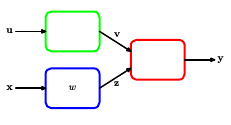

Fig.8 Illustration of a modular pattern recognition system in which the Jacobian matrix can be used to backpropagate error signals from the outputs through to earlier modules in the system.

### Jacobian Matrix Evaluation in Neural Networks

To evaluate the Jacobian matrix for a trained neural network, we start by performing forward propagation to compute the activations of all of the hidden and output units in the network. Next, for each row $ k $ of the Jacobian matrix, corresponding to the output unit $ k $, we backpropagate using the recursive relation:

$$
\frac{\partial y_k}{\partial a_j} = \sum_l \frac{\partial y_k}{\partial a_l} \frac{\partial a_l}{\partial a_j}
$$

This begins with the equations for the output units, where the derivatives can be computed directly from the activation function. For instance, if the output units have a sigmoid activation function, we use the derivative as:

$$
\frac{\partial y_k}{\partial a_j} = \delta_{kj} \sigma'(a_j)
$$

For softmax outputs, the derivative is given by:

$$
\frac{\partial y_k}{\partial a_j} = \delta_{kj} y_k - y_k y_j
$$

After computing the derivatives for the hidden units, we can continue to backpropagate to the inputs using the following recursive formula:

$$
\frac{\partial y_k}{\partial x_i} = \sum_j \frac{\partial y_k}{\partial a_j} \frac{\partial a_j}{\partial x_i}
$$

This results in the Jacobian matrix for the network.

Alternatively, the Jacobian matrix can also be evaluated using a forward propagation formalism, which is derived in a similar manner to the backpropagation procedure. This involves computing the derivatives directly in a forward pass.

Finally, as a check on the correctness of the implementation, numerical differentiation can be used to approximate the Jacobian. The finite difference formula for evaluating the derivative of $ y_k $ with respect to $ x_i $ is:

$$
\frac{\partial y_k}{\partial x_i} = \frac{y_k(x_i + \epsilon) - y_k(x_i - \epsilon)}{2 \epsilon} + O(\epsilon^2)
$$

This involves two forward propagations for a network with $ D $ inputs, and the accuracy of the derivative can be improved by using smaller values of $ \epsilon $ until numerical roundoff issues arise.



In [21]:
import math

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Random initialization of weights
        self.weights_input_hidden = [[0.5 for _ in range(self.hidden_size)] for _ in range(self.input_size)]
        self.weights_hidden_output = [[0.5 for _ in range(self.output_size)] for _ in range(self.hidden_size)]
        
        # Bias initialization
        self.bias_hidden = [0.5 for _ in range(self.hidden_size)]
        self.bias_output = [0.5 for _ in range(self.output_size)]
        
        # Activations
        self.hidden_activation = [0.0 for _ in range(self.hidden_size)]
        self.output_activation = [0.0 for _ in range(self.output_size)]
    
    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, inputs):
        self.inputs = inputs
        # Hidden layer activations
        for j in range(self.hidden_size):
            self.hidden_activation[j] = self.sigmoid(
                sum(self.inputs[i] * self.weights_input_hidden[i][j] for i in range(self.input_size)) + self.bias_hidden[j]
            )
        
        # Output layer activations
        for k in range(self.output_size):
            self.output_activation[k] = self.sigmoid(
                sum(self.hidden_activation[j] * self.weights_hidden_output[j][k] for j in range(self.hidden_size)) + self.bias_output[k]
            )
        
    def backward(self, target):
        # Compute output layer delta (error)
        output_delta = [0.0 for _ in range(self.output_size)]
        for k in range(self.output_size):
            output_delta[k] = (self.output_activation[k] - target[k]) * self.sigmoid_derivative(self.output_activation[k])
        
        # Compute hidden layer delta
        hidden_delta = [0.0 for _ in range(self.hidden_size)]
        for j in range(self.hidden_size):
            hidden_delta[j] = sum(output_delta[k] * self.weights_hidden_output[j][k] for k in range(self.output_size)) * self.sigmoid_derivative(self.hidden_activation[j])
        
        # Update weights and biases
        for j in range(self.hidden_size):
            for k in range(self.output_size):
                self.weights_hidden_output[j][k] -= self.learning_rate * output_delta[k] * self.hidden_activation[j]
        
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                self.weights_input_hidden[i][j] -= self.learning_rate * hidden_delta[j] * self.inputs[i]
        
        for j in range(self.hidden_size):
            self.bias_hidden[j] -= self.learning_rate * hidden_delta[j]
        
        for k in range(self.output_size):
            self.bias_output[k] -= self.learning_rate * output_delta[k]
        
        return output_delta, hidden_delta
    
    def compute_jacobian(self, inputs):
        """Compute the Jacobian matrix J = ∂y/∂x using backpropagation."""
        self.forward(inputs)
        
        # Start with the Jacobian matrix for the output units
        jacobian = []
        
        for k in range(self.output_size):
            jacobian_row = []
            for i in range(self.input_size):
                jacobian_row.append(self.compute_partial_derivative(inputs, k, i))
            jacobian.append(jacobian_row)
        
        return jacobian

    def compute_partial_derivative(self, inputs, output_unit, input_unit, epsilon=1e-5):
        """Estimate the partial derivative ∂y/∂x for each input unit using central finite differences."""
        # Perturb input in both directions
        inputs_perturbed_pos = inputs[:]
        inputs_perturbed_neg = inputs[:]
        inputs_perturbed_pos[input_unit] += epsilon
        inputs_perturbed_neg[input_unit] -= epsilon
        
        # Forward pass with perturbed inputs
        self.forward(inputs_perturbed_pos)
        output_pos = self.output_activation[output_unit]
        
        self.forward(inputs_perturbed_neg)
        output_neg = self.output_activation[output_unit]
        
        # Compute finite difference for the partial derivative
        return (output_pos - output_neg) / (2 * epsilon)
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for inputs, target in zip(X, y):
                self.forward(inputs)
                output_delta, hidden_delta = self.backward(target)
            
            # Optionally print error every 100 epochs
            if epoch % 100 == 0:
                error = sum((self.output_activation[k] - target[k]) ** 2 for k in range(self.output_size)) / len(y)
                print(f"Epoch {epoch}/{epochs}, Error: {error}")

# Example usage:
input_size = 2
hidden_size = 4
output_size = 1
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]  # XOR problem

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1)
nn.train(X, y, epochs=1000)

# Compute Jacobian for an input vector
input_vector = [0, 1]
jacobian_matrix = nn.compute_jacobian(input_vector)
print("Jacobian Matrix:")
for row in jacobian_matrix:
    print(row)


Epoch 0/1000, Error: 0.19893091110347785
Epoch 100/1000, Error: 0.06715281533898948
Epoch 200/1000, Error: 0.06716094347199585
Epoch 300/1000, Error: 0.06731817644515924
Epoch 400/1000, Error: 0.06747637488318167
Epoch 500/1000, Error: 0.06763584168089966
Epoch 600/1000, Error: 0.06779695685327947
Epoch 700/1000, Error: 0.06796010211282534
Epoch 800/1000, Error: 0.06812566324817976
Epoch 900/1000, Error: 0.06829403252286294
Jacobian Matrix:
[0.011570686042627896, 0.011173912367601345]


Epoch 0/1000, Error: 0.19893091110347785
Epoch 100/1000, Error: 0.06715281533898948
Epoch 200/1000, Error: 0.06716094347199585
Epoch 300/1000, Error: 0.06731817644515924
Epoch 400/1000, Error: 0.06747637488318167
Epoch 500/1000, Error: 0.06763584168089966
Epoch 600/1000, Error: 0.06779695685327947
Epoch 700/1000, Error: 0.06796010211282534
Epoch 800/1000, Error: 0.06812566324817976
Epoch 900/1000, Error: 0.06829403252286294


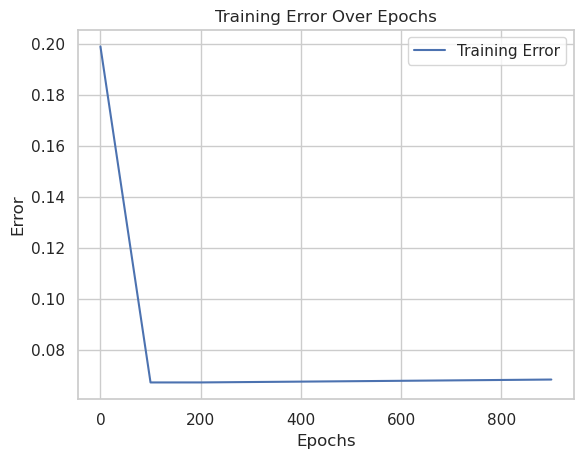

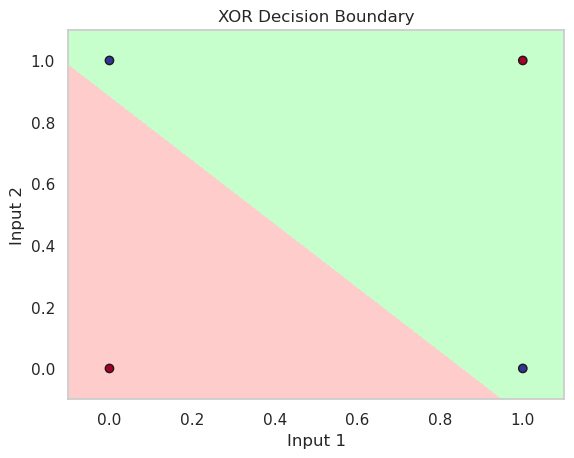

In [22]:
import math
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Random initialization of weights
        self.weights_input_hidden = [[0.5 for _ in range(self.hidden_size)] for _ in range(self.input_size)]
        self.weights_hidden_output = [[0.5 for _ in range(self.output_size)] for _ in range(self.hidden_size)]
        
        # Bias initialization
        self.bias_hidden = [0.5 for _ in range(self.hidden_size)]
        self.bias_output = [0.5 for _ in range(self.output_size)]
        
        # Activations
        self.hidden_activation = [0.0 for _ in range(self.hidden_size)]
        self.output_activation = [0.0 for _ in range(self.output_size)]
    
    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, inputs):
        self.inputs = inputs
        # Hidden layer activations
        for j in range(self.hidden_size):
            self.hidden_activation[j] = self.sigmoid(
                sum(self.inputs[i] * self.weights_input_hidden[i][j] for i in range(self.input_size)) + self.bias_hidden[j]
            )
        
        # Output layer activations
        for k in range(self.output_size):
            self.output_activation[k] = self.sigmoid(
                sum(self.hidden_activation[j] * self.weights_hidden_output[j][k] for j in range(self.hidden_size)) + self.bias_output[k]
            )
        
    def backward(self, target):
        # Compute output layer delta (error)
        output_delta = [0.0 for _ in range(self.output_size)]
        for k in range(self.output_size):
            output_delta[k] = (self.output_activation[k] - target[k]) * self.sigmoid_derivative(self.output_activation[k])
        
        # Compute hidden layer delta
        hidden_delta = [0.0 for _ in range(self.hidden_size)]
        for j in range(self.hidden_size):
            hidden_delta[j] = sum(output_delta[k] * self.weights_hidden_output[j][k] for k in range(self.output_size)) * self.sigmoid_derivative(self.hidden_activation[j])
        
        # Update weights and biases
        for j in range(self.hidden_size):
            for k in range(self.output_size):
                self.weights_hidden_output[j][k] -= self.learning_rate * output_delta[k] * self.hidden_activation[j]
        
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                self.weights_input_hidden[i][j] -= self.learning_rate * hidden_delta[j] * self.inputs[i]
        
        for j in range(self.hidden_size):
            self.bias_hidden[j] -= self.learning_rate * hidden_delta[j]
        
        for k in range(self.output_size):
            self.bias_output[k] -= self.learning_rate * output_delta[k]
        
        return output_delta, hidden_delta
    
    def compute_jacobian(self, inputs):
        """Compute the Jacobian matrix J = ∂y/∂x using backpropagation."""
        self.forward(inputs)
        
        # Start with the Jacobian matrix for the output units
        jacobian = []
        
        for k in range(self.output_size):
            jacobian_row = []
            for i in range(self.input_size):
                jacobian_row.append(self.compute_partial_derivative(inputs, k, i))
            jacobian.append(jacobian_row)
        
        return jacobian

    def compute_partial_derivative(self, inputs, output_unit, input_unit, epsilon=1e-5):
        """Estimate the partial derivative ∂y/∂x for each input unit using central finite differences."""
        # Perturb input in both directions
        inputs_perturbed_pos = inputs[:]
        inputs_perturbed_neg = inputs[:]
        inputs_perturbed_pos[input_unit] += epsilon
        inputs_perturbed_neg[input_unit] -= epsilon
        
        # Forward pass with perturbed inputs
        self.forward(inputs_perturbed_pos)
        output_pos = self.output_activation[output_unit]
        
        self.forward(inputs_perturbed_neg)
        output_neg = self.output_activation[output_unit]
        
        # Compute finite difference for the partial derivative
        return (output_pos - output_neg) / (2 * epsilon)
    
    def train(self, X, y, epochs):
        error_list = []  # To store the error for plotting
        
        for epoch in range(epochs):
            for inputs, target in zip(X, y):
                self.forward(inputs)
                output_delta, hidden_delta = self.backward(target)
            
            # Optionally print error every 100 epochs
            if epoch % 100 == 0:
                error = sum((self.output_activation[k] - target[k]) ** 2 for k in range(self.output_size)) / len(y)
                error_list.append(error)
                print(f"Epoch {epoch}/{epochs}, Error: {error}")
        
        return error_list

# Example usage:
input_size = 2
hidden_size = 4
output_size = 1
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]  # XOR problem

# Create the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1)

# Train the network and collect error data
error_list = nn.train(X, y, epochs=1000)

# Plot the training error over epochs
plt.plot(range(0, 1000, 100), error_list, label="Training Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error Over Epochs")
plt.legend()
plt.show()

# Plot decision boundary (for 2D XOR problem)
import numpy as np

# Create a meshgrid of points
x1_vals = np.linspace(-0.1, 1.1, 100)
x2_vals = np.linspace(-0.1, 1.1, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
grid_points = np.c_[X1.ravel(), X2.ravel()]

# Get predictions for all points in the grid
predictions = []
for point in grid_points:
    nn.forward(point)
    predictions.append(nn.output_activation[0])

# Reshape predictions to match the grid
Z = np.array(predictions).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, levels=[0.0, 0.5, 1.0], colors=['#ffcccc', '#c6ffcc'])
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[target[0] for target in y], cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("XOR Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()
